# Chapter 9: Support Vector Machines 支持向量机
+ "New" learning method invented by Vladamir Vapnik in the 1990's.
+ Likely best classifier at its time, now surpassed by gradient boosted trees and neural networks.

Three different but very closely related classifiers:
* Maximal margin classifier
* Support Vector classifier
* Support vector machine



+ Vladamir Vapnik 在 20 世纪 90 年代发明的“新”学习方法。
+ 可能是当时最好的分类器，现在已被梯度提升树和神经网络所超越。

三种不同但非常密切相关的分类器：
* 最大边际分类器
* 支持向量分类器
* 支持向量机

## Maximal Margin Classifier 最大边缘分类器
### Hyperplane 超平面
+ An optimal hyperplane that separates classes.  
+ **Hyperplane** - For any p dimensional space, it is a p-1 dimensional flat surface.
+ A line in 2 dimensions, a plane in three dimensions.
+ Mathematical definition in p dimensions: $\beta_0 + \beta_1 X_1 + ... + \beta_p X_p = 0$.
+ It divides whatever your dimension is into two pieces.



+ 一个用于划分类别的最佳超平面。
+ **超平面** - 对于任何 p 维空间，它都是一个 p-1 维平面。
+ 二维空间中的一条线，三维空间中的平面。
+ p 维空间中的数学定义：$\beta_0 + \beta_1 X_1 + ... + \beta_p X_p = 0$。
+ 它将你的维度分成两部分。




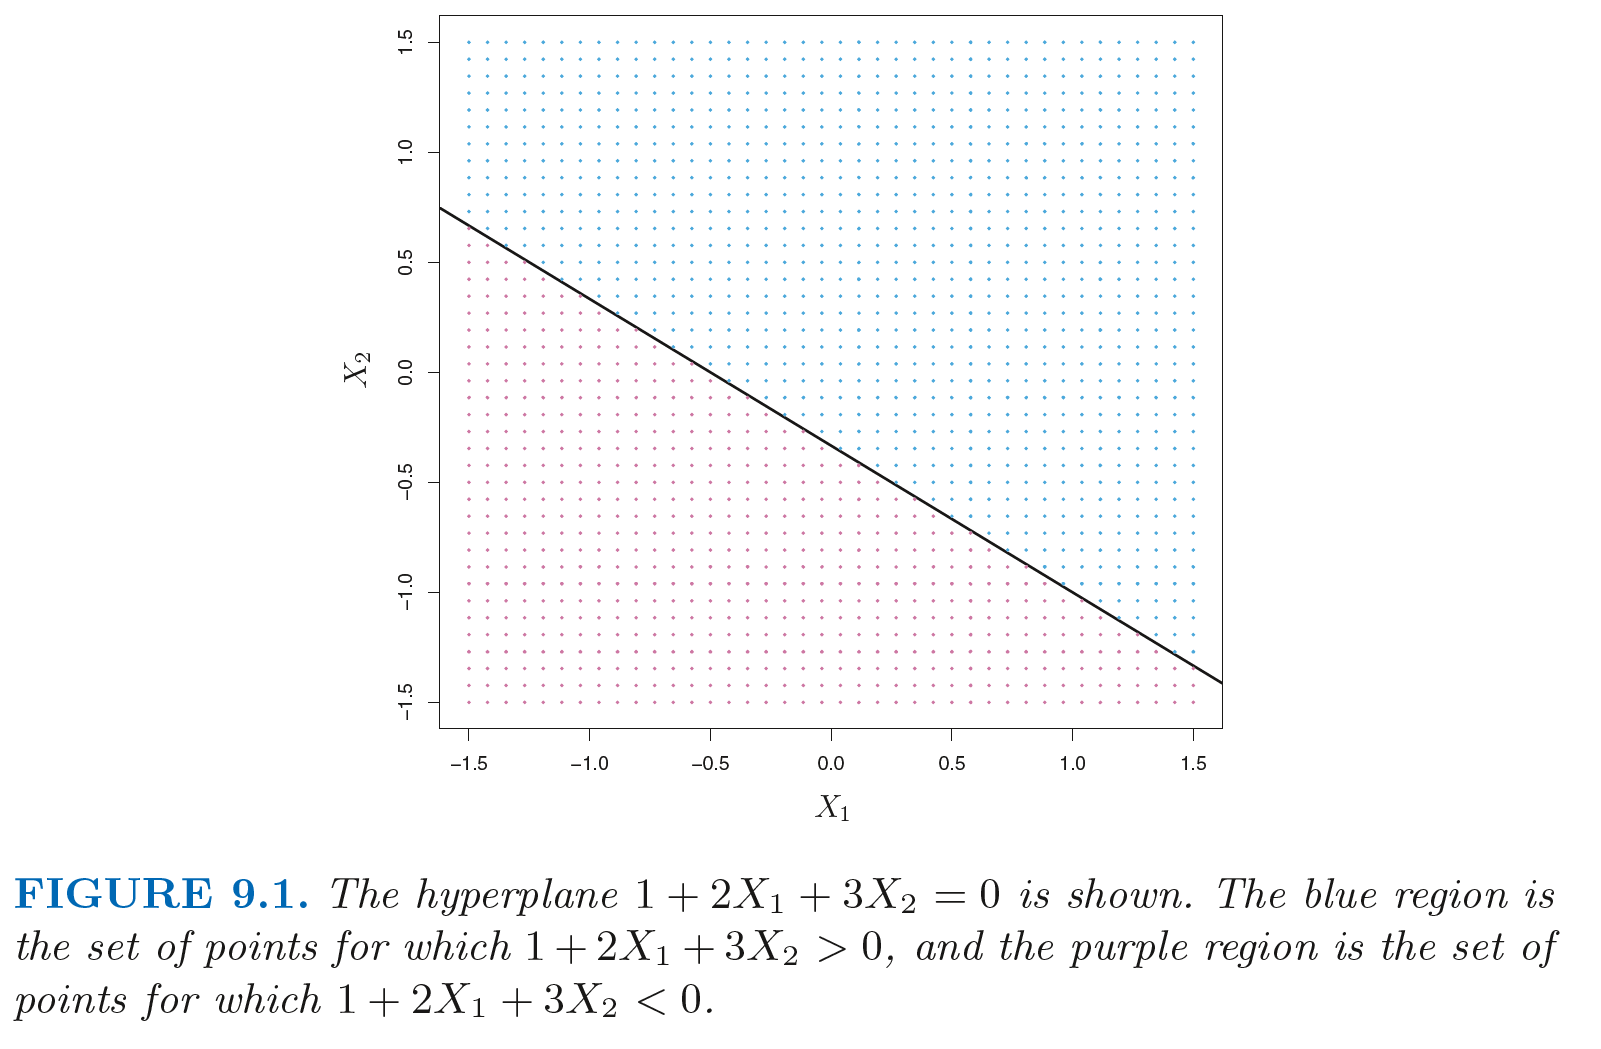

In [ ]:
from IPython.display import Image
Image('/content/pw91.PNG', width =700)

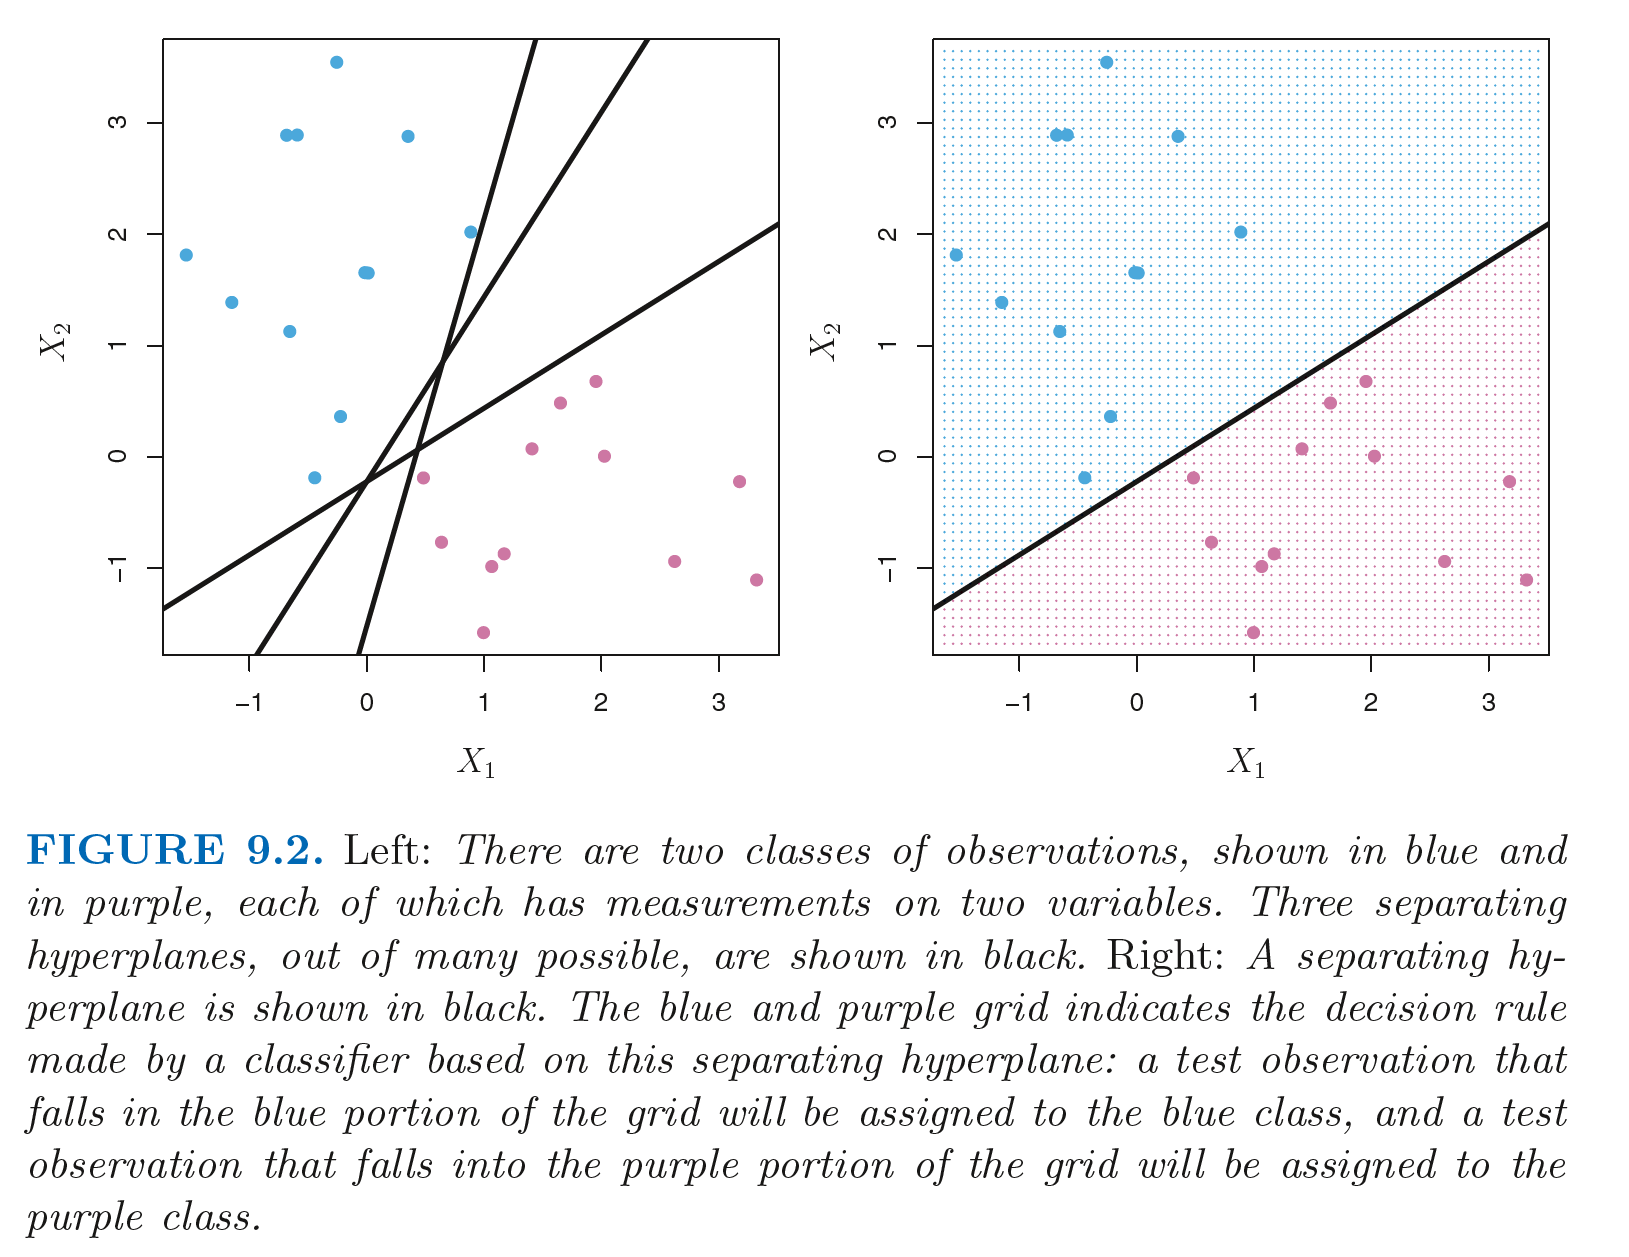

In [ ]:
Image('/content/pw92.PNG', width =700)

### Classification Using a Separating Hyperplane 使用分离超平面进行分类
+ Suppose we have  a $n \times p$ data matrix $\textbf{X}$
$$x_1 = \left[\begin{array}{c} x_{11} \\ \vdots \\ x_{1p} \end{array} \right], \; \ldots, \; x_n = \left[\begin{array}{c} x_{n1} \\ \vdots \\ x_{np} \end{array} \right]$$
and these observations fall into two classes, $y_1, \ldots, y_n \in \left\{-1,1\right\}$.
+ This approach is based upon the concept of **separating hyperplane**.
+ Consider the left hand panel in Fig 9.2, where the separating hyperplane has the property
$$\begin{eqnarray} \beta_0 + \beta_1x_{i1}+ \ldots + \beta_px_{ip} > 0 & \textrm{ if } & y_i=1 \\
  \beta_0 + \beta_1x_{i1}+ \ldots + \beta_px_{ip} < 0 & \textrm{ if } & y_i=-1 \end{eqnarray}$$
+ Multiplying both equations by $y_i$ yields $y_i(\beta_0 + \beta_1x_{i1}+ \ldots + \beta_px_{ip}) > 0$ for any correctly classified observation.
+ A test observation, $x^*$, can be classified based on the sign of $f(x^*)$ (positive (class 1) or negative (class -1)).
+ The magnitude of $f(x^*)$ can be used to measure how confident we are about the class assignment for $x^*$.


+ 假设我们有一个 $n \times p$ 数据矩阵 $\textbf{X}$
$$x_1 = \left[\begin{array}{c} x_{11} \\ \vdots \\ x_{1p} \end{array} \right], \; \ldots, \; x_n = \left[\begin{array}{c} x_{n1} \\ \vdots \\ x_{np} \end{array} \right]$$
并且这些观测值分为两类，$y_1, \ldots, y_n \in \left\{-1,1\right\}$。
+ 这种方法基于**分离超平面**的概念。
+ 考虑图 9.2 中的左侧面板，其中分离超平面具有以下属性
$$\begin{eqnarray} \beta_0 + \beta_1x_{i1}+ \ldots + \beta_px_{ip} > 0 & \textrm{ if } & y_i=1 \\
\beta_0 + \beta_1x_{i1}+ \ldots + \beta_px_{ip} < 0 & \textrm{ if } & y_i=-1 \end{eqnarray}$$
+ 将两个方程乘以 $y_i$，对于任何正确分类的观察，得出 $y_i(\beta_0 + \beta_1x_{i1}+ \ldots + \beta_px_{ip}) > 0$。
+ 测试观察值 $x^*$ 可根据 $f(x^*)$ 的符号进行分类（正（第 1 类）或负（第 -1 类））。
+ $f(x^*)$ 的大小可用于衡量我们对 $x^*$ 的类别分配有多大信心。

### The maximal margin classifier 最大边缘分类器
+ If the data is perfectly separable then an infinite number of hyperplanes will exist that can perfectly separate the data.
+ A natural choice is to choose a hyperplane that maximizes the distance from each observation (training) to the hyperplane - one that has a large margin - the maximum margin.

+ 如果数据完全可分离，那么将存在无数个可以完美分离数据的超平面。
+ 一个自然的选择是选择一个超平面，使每个观察（训练）到超平面的距离最大化 - 具有较大边距的超平面 - 最大边距。

### What defines maximum margin? 最大保证金由什么定义？
+ In the linearly separable case we find the line that has the maximum margin between the two classes.
+ The maximum margin is defined as the distance of the closet point to the separating hyperplane.
+ So, we are maximizing the minimum distance from the hyperplane.
+ All other points are of no consequence which is a bit scary but it happens to work well.
+ These minimum distance points are called the **support vectors**.

+ 在线性可分的情况下，我们找到两个类之间具有最大边距的线。
+ 最大边距定义为最接近点到分离超平面的距离。
+ 因此，我们要最大化与超平面的最小距离。
+ 所有其他点都无关紧要，这有点吓人，但恰好效果很好。
+ 这些最小距离点称为**支持向量**。

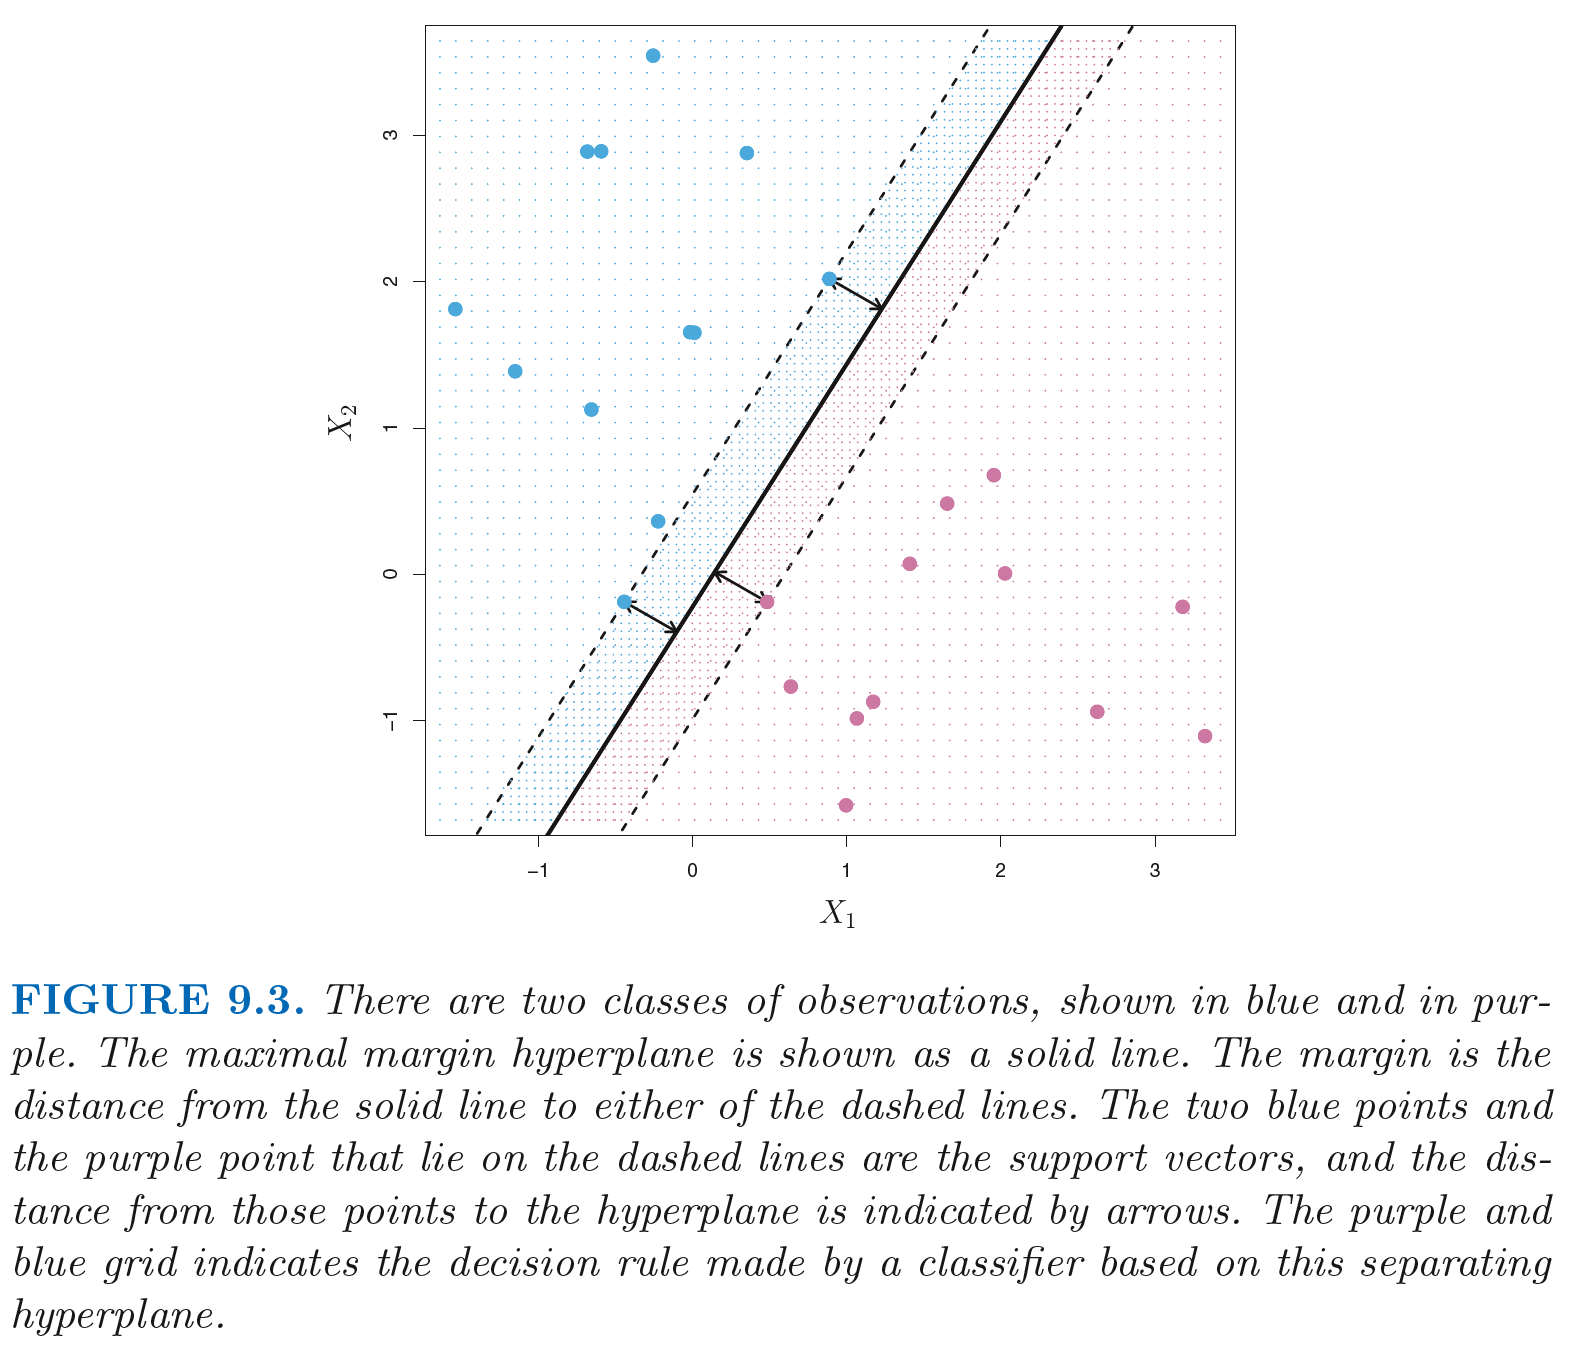

In [ ]:
Image('/content/pw93.PNG', width =600)

### Contruction of the Maximal Margin Classifier 最大边缘分类器的构建
+ Set of training observations, $x_1, \ldots, x_n \in \mathbb{R}^p$
+ Associated class labels, $y_1, \ldots, y_n \in \left\{ -1, 1 \right\}$
+ The maximal margin hyperplane is the solution to:
$$    \max_{\beta_0, \ldots, \beta_p, M}{M} \\
   \textrm{subject to } \sum_{j=1}^p{\beta_j^2} = 1 \\
   y_i(\beta_0 + \beta_1 x_{i1} + \ldots + \beta_p x_{ip}) \geq M \quad \forall i=1, \ldots, n $$
   where $M$ is the width of the margin.


+ 训练观测集，$x_1, \ldots, x_n \in \mathbb{R}^p$
+ 关联类标签，$y_1, \ldots, y_n \in \left\{ -1, 1 \right\}$
+ 最大边距超平面是以下问题的解：
$$ \max_{\beta_0, \ldots, \beta_p, M}{M} \\
\textrm{subject to } \sum_{j=1}^p{\beta_j^2} = 1 \\
y_i(\beta_0 + \beta_1 x_{i1} + \ldots + \beta_p x_{ip}) \geq M \quad \forall i=1, \ldots, n $$
其中 $M$ 是边距的宽度。




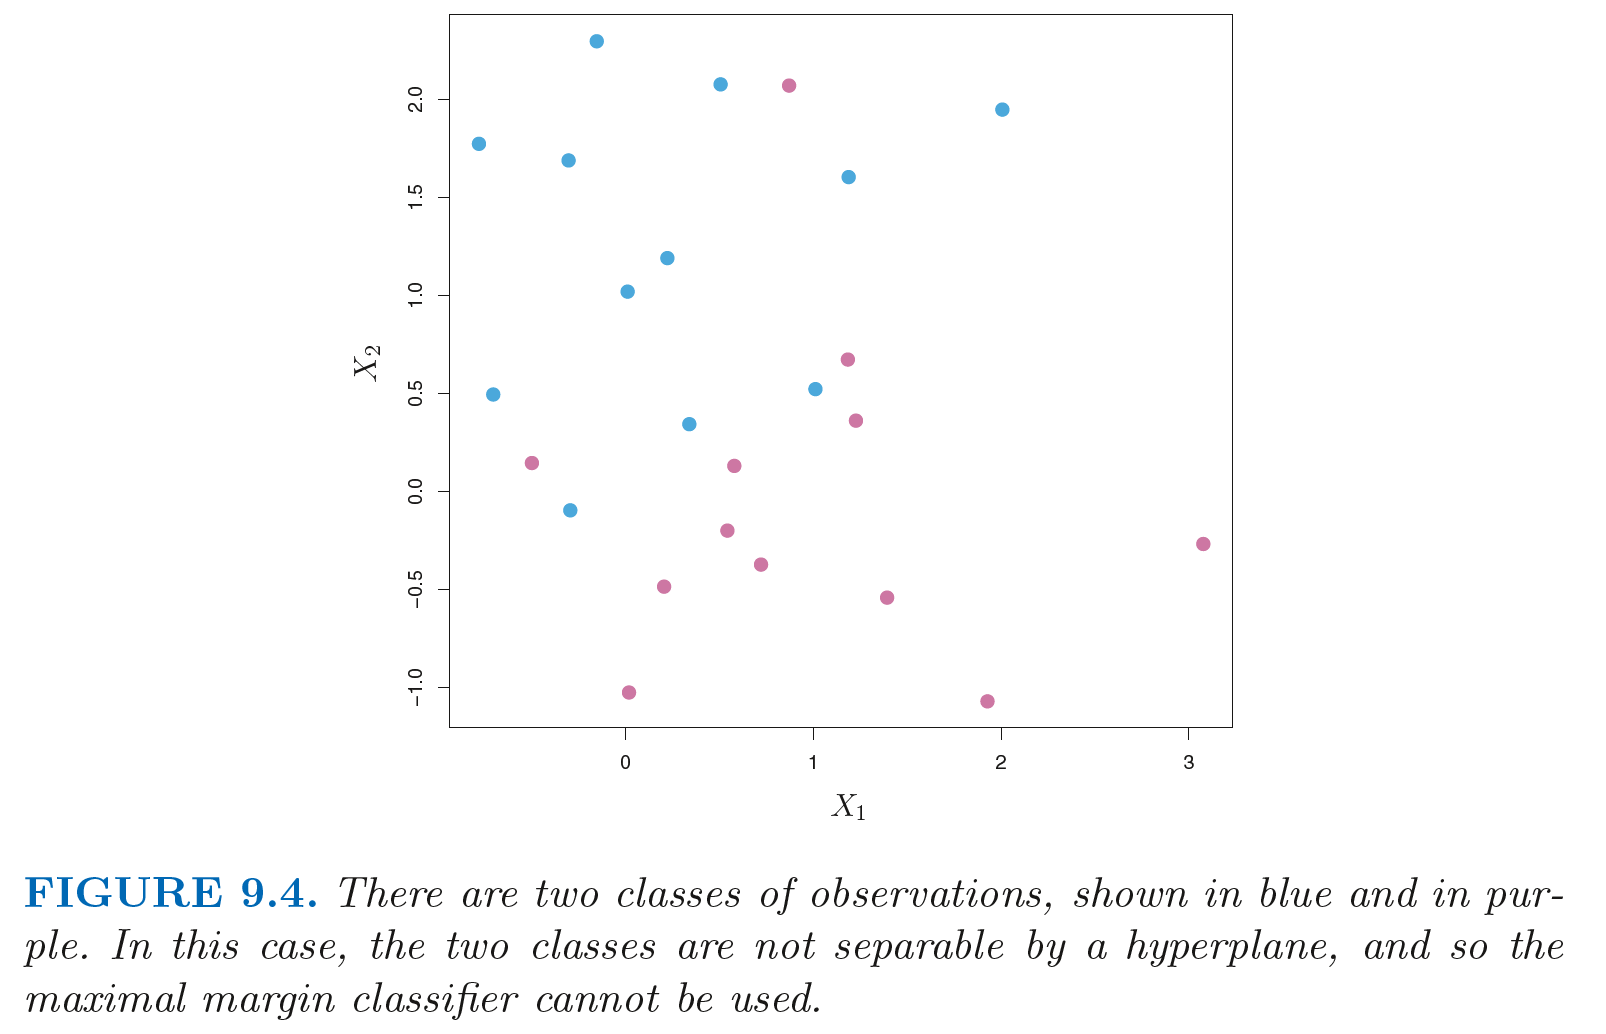

In [ ]:
Image('/content/pw94.PNG', width =700)

## Support Vector Classifiers 支持向量分类器
+ If the data is not linearly separable then no hyperplane can separate the data and thus no margin can exist.
+ This case is most common with real data.
+ The maximum margin classifier is very sensitive to single data points.
+ The hyperplane can change drastically with the addition of one new data point.
+ To help combat this type of overfitting and to allow for non-separable classification we can use a soft margin.
+ We allow some observation to be on the wrong side of the hyperplane or within the margin.
+ This margin violation makes the margin 'soft'.
+ This will provide:
    + Greater robustness to individual observations
    + Better classification of most of the training observations
+ Also known as **soft margin classifier**


+ 如果数据不是线性可分的，那么没有超平面可以分离数据，因此不存在边距。
+ 这种情况在实际数据中最为常见。
+ 最大边距分类器对单个数据点非常敏感。
+ 添加一个新数据点后，超平面可能会发生巨大变化。
+ 为了帮助对抗这种过度拟合并允许不可分分类，我们可以使用软边距。
+ 我们允许某些观察结果位于超平面的错误一侧或在边距内。
+ 这种边距违规使边距变得“软”。
+ 这将提供：
    + 对单个观察结果的更强鲁棒性
    + 对大多数训练观察结果的更好分类
+ 也称为 **软边距分类器**


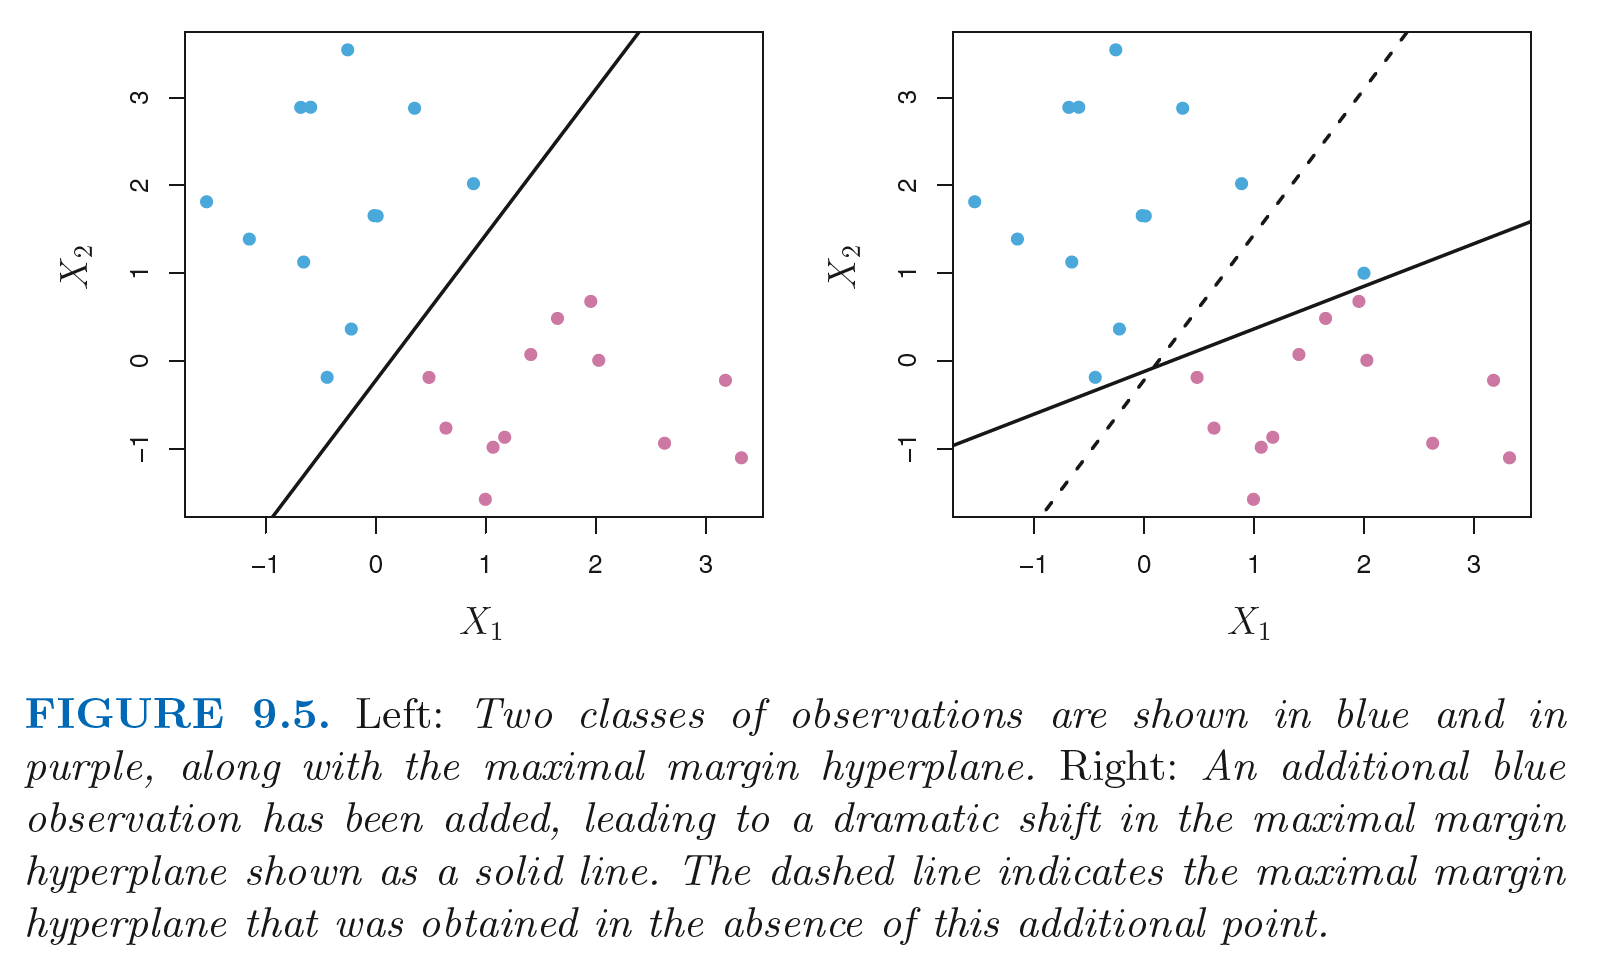

In [ ]:
Image('/content/pw95.PNG', width =700)

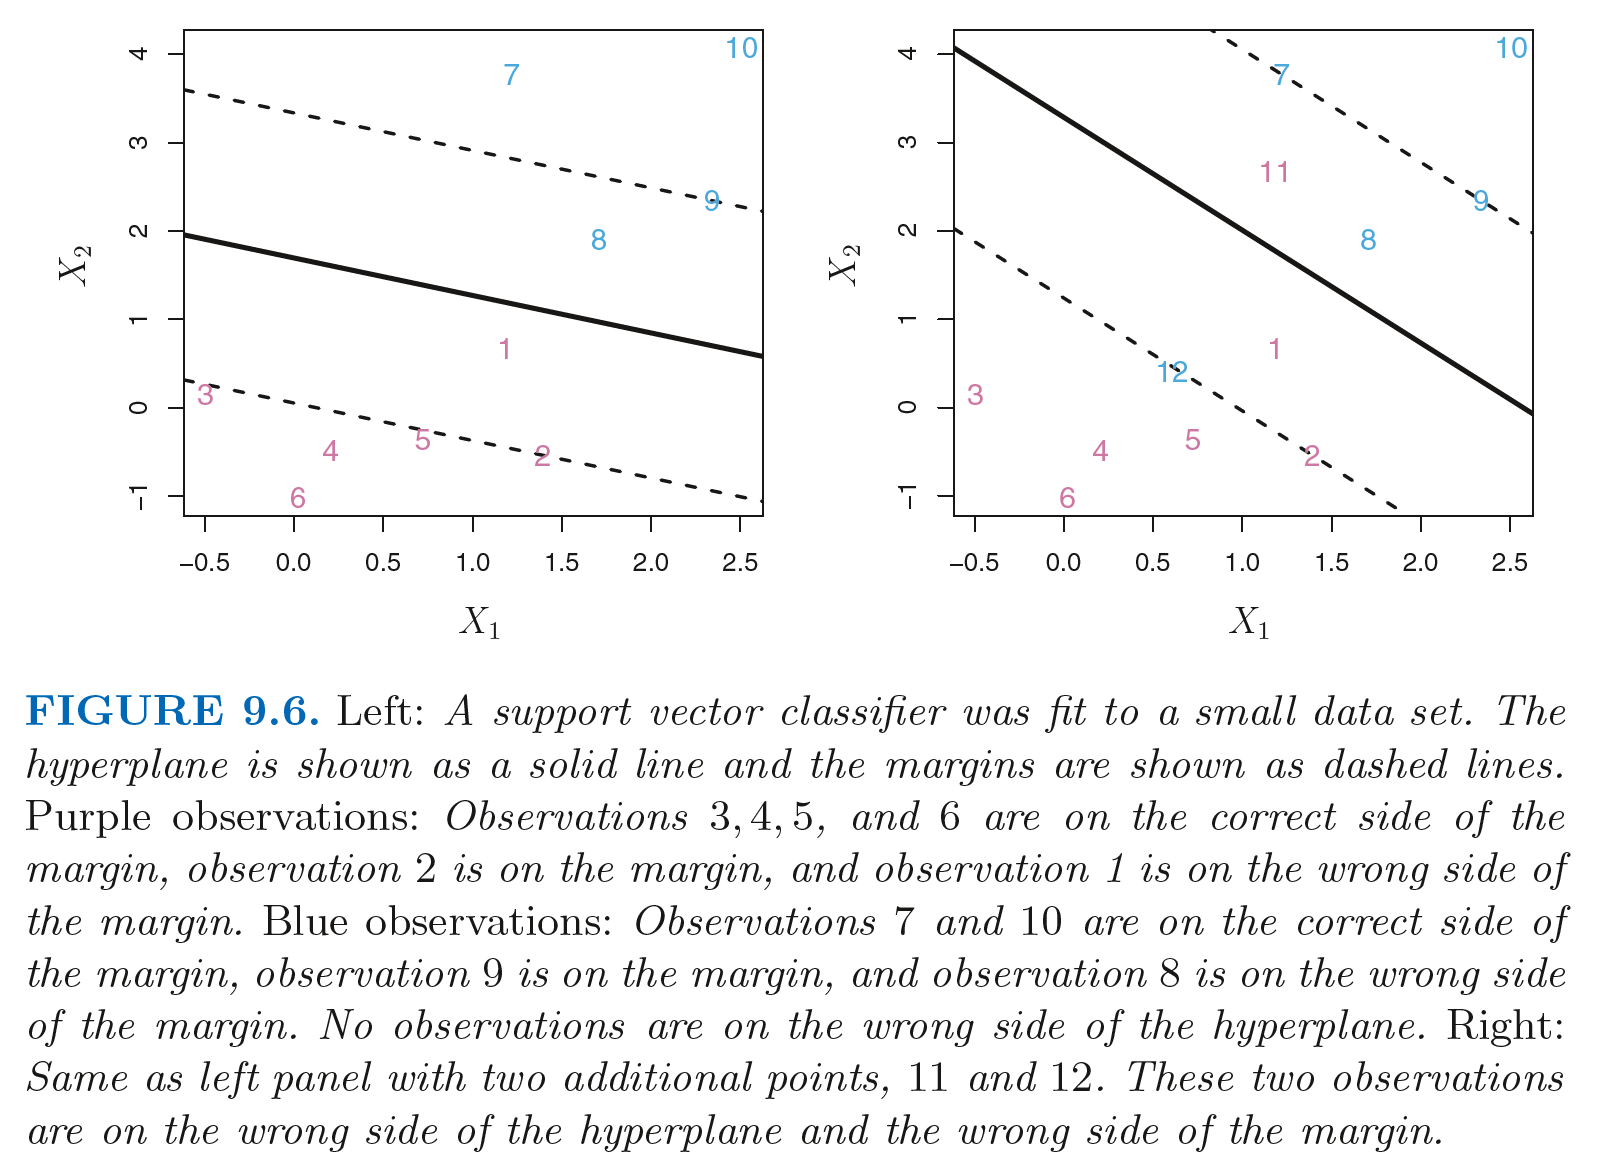

In [ ]:
Image('/content/pw96.PNG', width =700)

+ The hyperplane is chosen to correctly separate most of the training observations into the two classes, but may misclassify a few observations.
+ The problem formulation is tweaked such that we allow for some total amount of error, C.
$$    \max_{\beta_0, \ldots, \beta_p, \epsilon_1, \ldots , \epsilon_n M}{M} \\
   \textrm{subject to } \sum_{j=1}^p{\beta_j^2} = 1 \\
   y_i(\beta_0 + \beta_1 x_{i1} + \ldots + \beta_p x_{ip}) \geq M(1-\epsilon_i) \\
   \epsilon_i \geq 0, \quad \sum_{i=1}^n{\epsilon_i} \leq C$$
+ We seek to make $M$ as large as possible.
+ The errors, $\epsilon_i$,  are called slack variables, which allow observations to be on the wrong side of the margin or hyperplane.
$$ \begin{eqnarray} \epsilon_i = 0 & i^\textrm{th} \textrm{observation on the correct side of the margin} \\
\epsilon_i >0 & i^\textrm{th} \textrm{observation on the wrong side of the margin} \\
\epsilon_i >1 & \; i^\textrm{th} \textrm{observation on the wrong side of the hyperplane} \end{eqnarray}$$
+ C bounds the sum of the $\epsilon_i$'s
+ This total error acts as an allowance like a balance in the bank that you can spend on the amount of error you can make.
$$ \begin{eqnarray} C = 0 & \textrm{no budget for violations to the margin} \\
C >0 & \textrm{  no more than C observations can be  on the wrong side of the hyperplane}  \end{eqnarray}$$
+ C is chosen through cross-validation.
+ Observation that lies strictly on the correct side of the margin does not affect the support vector classifier.
+ Observations that lie directly on the margin, or on the wrong side of the margin, are known as **support vectors**, which do affect the support vector classifier.


+ 选择超平面是为了正确地将大多数训练观测值分成两个类，但可能会对一些观测值进行错误分类。
+ 问题公式经过调整，我们允许存在一定总量的误差 C。
$$ \max_{\beta_0, \ldots, \beta_p, \epsilon_1, \ldots , \epsilon_n M}{M} \\
\textrm{subject to } \sum_{j=1}^p{\beta_j^2} = 1 \\
y_i(\beta_0 + \beta_1 x_{i1} + \ldots + \beta_p x_{ip}) \geq M(1-\epsilon_i) \\
\epsilon_i \geq 0, \quad \sum_{i=1}^n{\epsilon_i} \leq C$$
+ 我们力求使 $M$ 尽可能大。
+ 误差 $\epsilon_i$ 称为松弛变量，允许观测值位于边距或超平面的错误一侧。
$$ \begin{eqnarray} \epsilon_i = 0 & i^\textrm{th} \textrm{观测值位于边距的正确一侧} \\
\epsilon_i >0 & i^\textrm{th} \textrm{观测值位于边距的错误一侧} \\
\epsilon_i >1 & \; i^\textrm{th} \textrm{观测值位于超平面的错误一侧} \end{eqnarray}$$
+ C 限制了 $\epsilon_i$ 的总和
+ 这个总误差就像银行余额一样，您可以根据自己可能犯的错误数额来使用它。
$$ \begin{eqnarray} C = 0 & \textrm{不为违反边际而预留预算} \\
C >0 & \textrm{在超平面错误侧的观测值不能超过 C 个} \end{eqnarray}$$
+ C 通过交叉验证选择。
+ 严格位于边际正确侧的观测值不会影响支持向量分类器。
+ 直接位于边际或边际错误侧的观测值称为**支持向量**，它们会影响支持向量分类器。

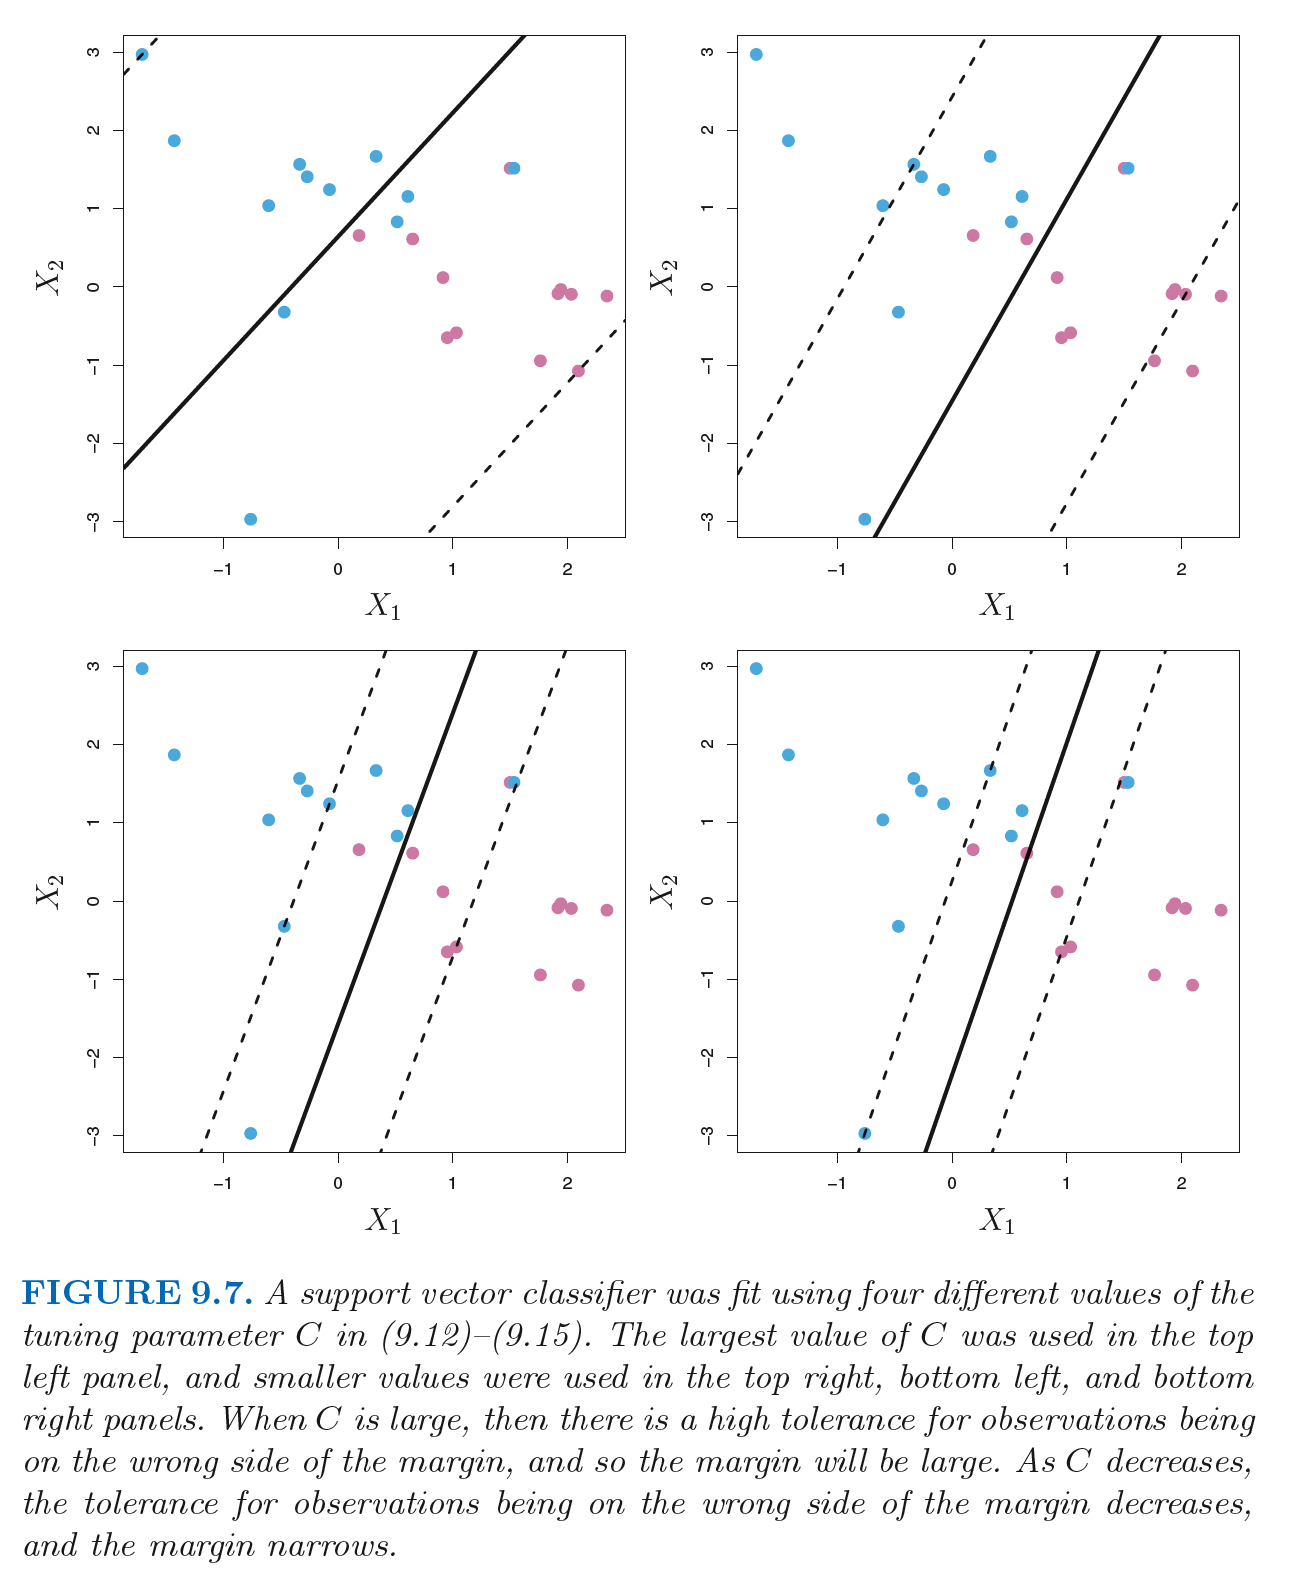

In [ ]:
Image('/content/pw97.PNG', width =700)

### Lab

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

# We'll define a function to draw a nice plot of an SVM 我们将定义一个函数来绘制 SVM 的漂亮图
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines 图中用垂直线表示的支持向量
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [ ]:
from sklearn.svm import SVC

+ The ${\tt SVC()}$ function can be used to fit a support vector classifier when the argument ${\tt kernel="linear"}$ is used.
+ This function uses a slightly different formulation of the equations we saw in lecture to build the support vector classifier.
+ The ${\tt c}$ argument allows us to specify the cost of a violation to the margin. When the ${\tt c}$ argument is **small**, then the margins will be wide and many support vectors will be on the margin or will violate the margin.
+ When the ${\tt c}$ argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin.

+ We can use the ${\tt SVC()}$ function to fit the support vector classifier for a given value of the ${\tt cost}$ parameter.
+ Here we demonstrate the use of this function on a two-dimensional example so that we can plot the resulting decision boundary.


+ 使用参数 ${\tt kernel="linear"}$ 时，可以使用 ${\tt SVC()}$ 函数来拟合支持向量分类器。
+ 此函数使用与我们在讲座中看到的方程式略有不同的公式来构建支持向量分类器。
+ ${\tt c}$ 参数允许我们指定违反边距的成本。当 ${\tt c}$ 参数**较小**时，边距将很宽，许多支持向量将位于边距上或违反边距。
+ 当 ${\tt c}$ 参数很大时，边距将很窄，并且边距上或违反边距的支持向量很少。

+ 我们可以使用 ${\tt SVC()}$ 函数来为给定的 ${\tt cost}$ 参数值拟合支持向量分类器。
+ 在这里，我们演示了在二维示例上使用此函数，以便我们可以绘制生成的决策边界。

In [ ]:
# Generating random data: 20 observations of 2 features and divide into two classes.
# 生成随机数据：2 个特征的 20 个观测值并分为两类。
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1]+1

Text(0, 0.5, 'X2')

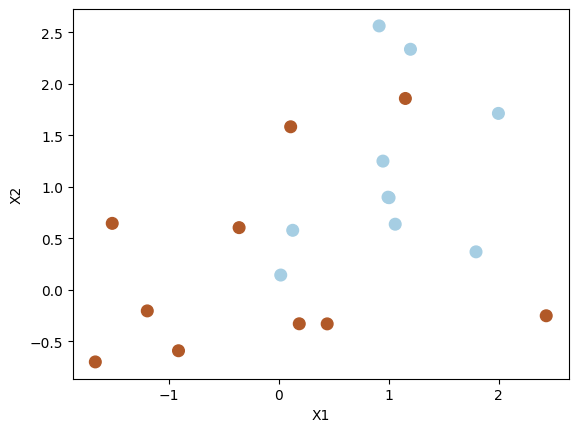

In [ ]:
# Plot the data to see whether the classes are linearly separable:
# 绘制数据以查看类别是否可线性分离：
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Nope; not linear. Next, we fit the support vector classifier:

不，不是线性的。接下来，我们拟合支持向量分类器：

In [ ]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, kernel='linear')

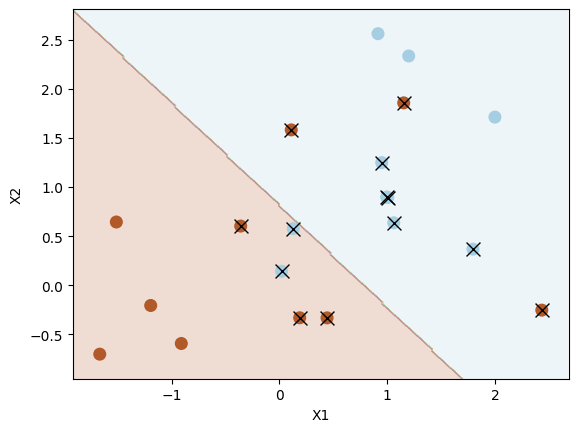

Number of support vectors:  13


In [ ]:
plot_svc(svc, X, y)

+ The region of feature space that will be assigned to the −1 class is shown in light blue, and the region that will be assigned to the +1 class is shown in brown.
+ The decision boundary between the two classes is linear (because we used the argument ${\tt kernel="linear"}$).

+ The support vectors are plotted with crosses and the remaining observations are plotted as circles;
+ We see here that there are 13 support vectors.
+ We can determine their identities as follows:


+ 分配给 −1 类的特征空间区域显示为浅蓝色，分配给 +1 类的区域显示为棕色。
+ 两个类之间的决策边界是线性的（因为我们使用了参数 ${\tt kernel="linear"}$）。

+ 支持向量用十字表示，其余观测值用圆圈表示；
+ 我们在这里看到有 13 个支持向量。
+ 我们可以按如下方式确定它们的身份：

In [ ]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

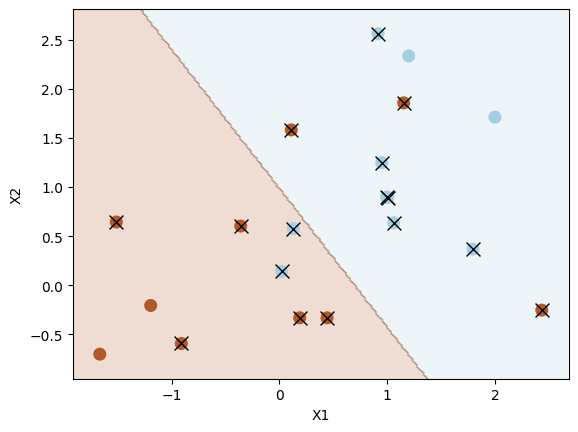

Number of support vectors:  16


In [ ]:
# Use a smaller value of the C parameter 使用较小的 C 参数值
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

+ Now that a smaller value of the ${\tt c}$ parameter is being used, we obtain a larger number of support vectors, because the margin is now **wider**.
+ The ${\tt sklearn.grid\_search}$ module includes a a function ${\tt GridSearchCV()}$ to perform cross-validation.
+ In order to use this function, we pass in relevant information about the set of models that are under consideration.


+ 现在，使用较小的 ${\tt c}$ 参数值，我们获得了更多的支持向量，因为边距现在**更宽**。
+ ${\tt sklearn.grid\_search}$ 模块包含一个函数 ${\tt GridSearchCV()}$ 来执行交叉验证。
+ 为了使用这个函数，我们传入了有关正在考虑的模型集的相关信息。


In [ ]:
# Perform 10-fold cross-validation to compare SVCs with a linear kernel, using a range of values of the cost parameter:
# 执行 10 倍交叉验证，使用成本参数的一系列值将 SVC 与线性核进行比较：
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation 通过交叉验证选择最佳C参数
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [ ]:
# the cross-validation errors for each of these models:
# 每个模型的交叉验证误差：
clf.cv_results_

{'mean_fit_time': array([0.00158617, 0.00107498, 0.00107245, 0.00110221, 0.00116713,
        0.00106578, 0.00142303]),
 'std_fit_time': array([9.01164827e-04, 5.57133565e-05, 8.84489742e-05, 6.66336210e-05,
        4.56016966e-05, 1.36782249e-04, 1.28274389e-04]),
 'mean_score_time': array([0.00097432, 0.00077231, 0.00078402, 0.00084963, 0.00109837,
        0.00079522, 0.0009944 ]),
 'std_score_time': array([3.77923128e-04, 2.60354944e-05, 2.65584171e-05, 1.21922944e-04,
        7.24110553e-04, 7.10816275e-05, 3.73805310e-04]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0

In [ ]:
# the best parameters obtained 获得的最佳参数
clf.best_params_

{'C': 0.001}

In [ ]:
# generate a test data set:
# 生成测试数据集：
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1]-1

In [ ]:
# predict the class labels of these test observations. 预测这些测试观测的类标签。
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


+ 14 of the test observations are correctly classified.
+ Consider a situation in which the two classes are linearly separable.
+ Then we can find a separating hyperplane using the  ${\tt svm()}$  function.
+ First we'll give our simulated data a little nudge so that they are linearly separable:


+ 14 个测试观测值被正确分类。
+ 考虑两个类别线性可分的情况。
+ 然后我们可以使用 ${\tt svm()}$ 函数找到分离超平面。
+ 首先，我们将对我们的模拟数据进行一些调整，使它们线性可分：

Text(0, 0.5, 'X2')

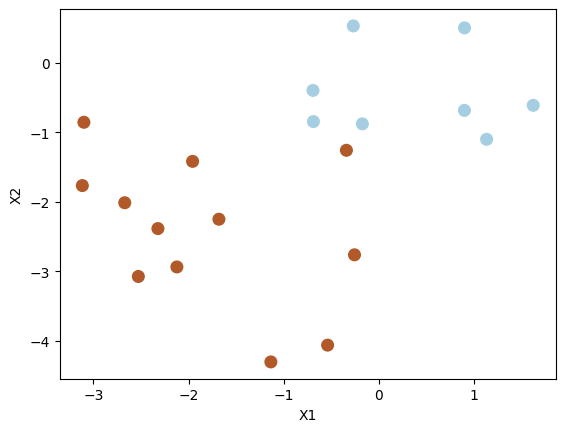

In [ ]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

+ the observations are **just barely linearly** separable.
+ Fit the support vector classifier and plot the resulting hyperplane, using a very large value of ${\tt cost}$ so that no observations are misclassified.

+ 观测值**勉强线性**可分离。
+ 拟合支持向量分类器并绘制所得超平面，使用非常大的 ${\tt cost}$ 值，这样就不会对观测值进行错误分类。

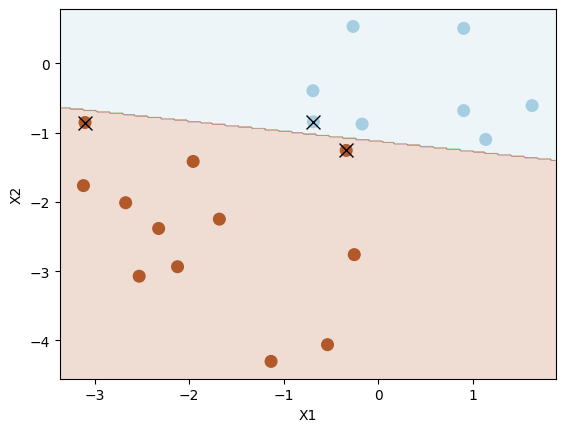

Number of support vectors:  3


In [ ]:
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test)

+ No training errors were made and only three support vectors were used.
+ However, we can see from the figure that the margin is very narrow (because the observations that are **not** support vectors, indicated as circles, are very close to the decision boundary).
+ It seems likely that this model will perform poorly on test data.
+ Let's try a smaller value of ${\tt cost}$:


+ 没有出现任何训练错误，只使用了三个支持向量。
+ 但是，我们可以从图中看到，边距非常窄（因为不是支持向量的观测值（以圆圈表示）非常接近决策边界）。
+ 该模型在测试数据上的表现似乎很差。
+ 让我们尝试一个较小的 ${\tt cost}$ 值：

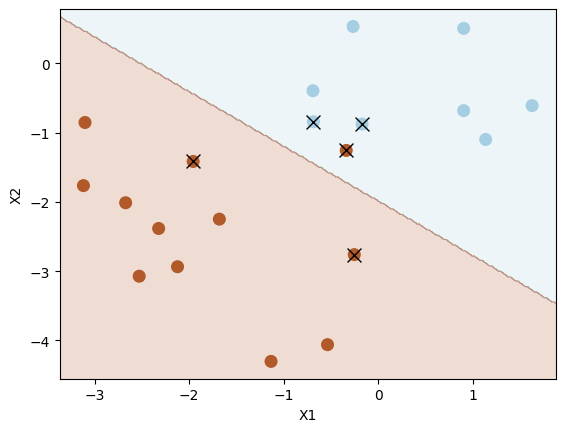

Number of support vectors:  5


In [ ]:
svc4 = SVC(C=1, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)

+ Using ${\tt cost=1}$, we misclassify a training observation, but we also obtain a much wider margin and make use of five support vectors.
+ It seems likely that this model will perform better on test data than the model with ${\tt cost=1e5}$.


+ 使用 ${\tt cost=1}$，我们对训练观察进行了错误分类，但我们也获得了更大的余量并利用了五个支持向量。
+ 该模型在测试数据上的表现似乎比 ${\tt cost=1e5}$ 的模型更好。

## Support Vector Machines 支持向量机


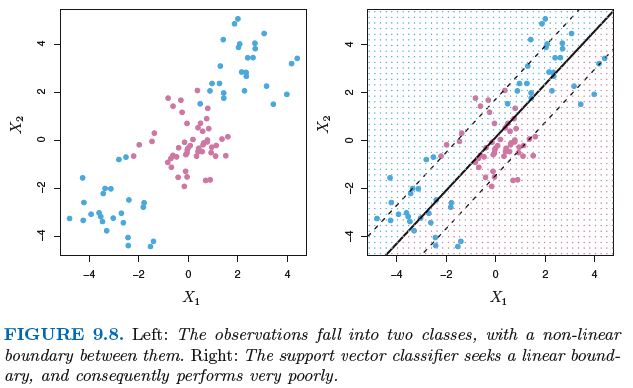

In [ ]:
Image('/content/pw98.PNG', width =600)


### Classification with Non-linear Decision Boundaries 非线性决策边界分类
+ For data that has a non-linear separating hyperplane, something different must be done.
+ We can transform the variables as in previous chapters - squaring them, creating interaction terms, etc...
+ For example, instead of fitting a support vector classifier using $p$ features,
$$X_1,X_2, \ldots, X_p$$
we could instead fit using $2p$ features
$$X_1,X_1,^2, X_2, X_2^2, \ldots, X_p, X_p^2$$
+ Then the opitimization problem will be
$$    \max_{\beta_0, \beta_{11}, \beta_{12},\ldots, \beta_{p1}, \beta_{p2}, \epsilon_1, \ldots , \epsilon_n, M}{M} \\
   \textrm{subject to } \sum_{j=1}^p\sum_{k=1}^2{\beta_{jk}^2} = 1 \\
   y_i\left(\beta_0 + \sum_{j=1}^p{\beta_{j1} x_{ij}} + \sum_{j=1}^p{\beta_{j2} x_{ij}^2}\right) \geq M(1-\epsilon_i) \\
  \epsilon_i \geq 0, \quad \sum_{i=1}^n{\epsilon_i} \leq C $$
  which will lead to a non-linear decision boundary.


+ 对于具有非线性分离超平面的数据，必须采取不同的措施。
+ 我们可以像前几章一样转换变量 - 求平方、创建交互项等...
+ 例如，我们可以使用 $2p$ 个特征来拟合支持向量分类器，而不是使用 $p$ 个特征
$$X_1,X_2, \ldots, X_p$$
$$
+ 那么优化问题将是
$$ \max_{\beta_0, \beta_{11}, \beta_{12},\ldots, \beta_{p1}, \beta_{p2}, \epsilon_1, \ldots , \epsilon_n, M}{M} \\
\textrm{subject to } \sum_{j=1}^p\sum_{k=1}^2{\beta_{jk}^2} = 1 \\
y_i\left(\beta_0 + \sum_{j=1}^p{\beta_{j1} x_{ij}} + \sum_{j=1}^p{\beta_{j2} x_{ij}^2}\right) \geq M(1-\epsilon_i) \\
\epsilon_i \geq 0, \quad \sum_{i=1}^n{\epsilon_i} \leq C $$
这将导致非线性决策边界。
  
### The SVM
+ Extension of SVC that results from enlarging feature space by using kernels in an efficient manner without doing those transformations.
+ The solution to SVM's involves only inner products of the observations.
+ The **inner products** of two $r$-vectors $a$ and $b$ is defined by
$$\langle a, b \rangle = \sum_{i=1}^r{a_i b_i}$$
Thus the innerproduct of two observations $x_i, x_{i^\prime}$ is
$$\langle x_i, x_{i^\prime} \rangle = \sum_{j=1}^p{x_{ij}, x_{{i^\prime}j}}$$
+ The linear SVC can the be represented as
$$f(x) = \beta_0 + \sum_{i=1}^n{\alpha_i \langle x, x_i \rangle}$$
where there are $n$ parameters $\alpha_i, \; i=1, \ldots, n$, one per training observation.
+ To estimate these parameters, all we need are the ${n \choose 2}$ inner products $x_i, x_{i^\prime}$ between all pairs of training observations.
+ $\alpha_i$ is nonzero only for the support vectors in the solution. Therefore, we can write
$$f(x) = \beta_0 + \sum_{i \in S}{\alpha_i \langle x, x_i \rangle}$$
where $S$ is the collection of indices of those support points.
+ The decision boundary is just a weighted sum of the inner product between observations that are the support vectors.
+ The inner product can be replaced with a kernel function, $K(x_i, x_{i^\prime})$, which is a function that quantifies the similarity of two observations (measure a degree of closeness).
+ So the further the two points in the kernel function are, the smaller the result of the kernel calculation.
+ Linear kernel is just the standard inner product.
+ Polynomial kernel is linear kernel taken to the power of a chosen polynomial.
$$K(x_i, x_{i^\prime}) = (1+\sum_{j=1}^p{x_{ij} x_{{i^\prime}j}})^d$$
+ The radial basis function is proportional to the squared distance between points.
$$K(x_i, x_{i^\prime}) = \exp(-\gamma\sum_{j=1}^p{(x_{ij} -  x_{{i^\prime}j})^2})$$

+ Kernels allow for very high dimensional (infinite with radial basis function) feature space enlargement without actually going into that space.



+ SVC 的扩展，通过高效使用核函数来扩大特征空间，而无需进行那些转换。
+ SVM 的解决方案仅涉及观测值的内积。
+ 两个 $r$ 向量 $a$ 和 $b$ 的 **内积** 定义为
$$\langle a, b \rangle = \sum_{i=1}^r{a_i b_i}$$
因此，两个观测值 $x_i, x_{i^\prime}$ 的内积为
$$\langle x_i, x_{i^\prime} \rangle = \sum_{j=1}^p{x_{ij}, x_{{i^\prime}j}}$$
+ 线性 SVC 可以表示为
$$f(x) = \beta_0 + \sum_{i=1}^n{\alpha_i \langle x, x_i \rangle}$$
其中有 $n$ 个参数 $\alpha_i, \; i=1, \ldots, n$，每个训练观测值一个。
+ 为了估计这些参数，我们所需要的只是所有训练观测对之间的 ${n \choose 2}$ 个内积 $x_i, x_{i^\prime}$。
+ $\alpha_i$ 仅对解决方案中的支持向量不为零。因此，我们可以写出
$$f(x) = \beta_0 + \sum_{i \in S}{\alpha_i \langle x, x_i \rangle}$$
其中 $S$ 是这些支持点的索引集合。
+ 决策边界只是作为支持向量的观测之间的内积的加权和。
+ 内积可以用核函数 $K(x_i, x_{i^\prime})$ 代替，这是一个量化两个观测相似度（测量接近程度）的函数。
+ 因此，核函数中的两个点越远，核计算的结果就越小。
+ 线性核只是标准内积。
+ 多项式核是取所选多项式幂的线性核。
$$K(x_i, x_{i^\prime}) = (1+\sum_{j=1}^p{x_{ij} x_{{i^\prime}j}})^d$$
+ 径向基函数与点之间的平方距离成正比。
$$K(x_i, x_{i^\prime}) = \exp(-\gamma\sum_{j=1}^p{(x_{ij} - x_{{i^\prime}j})^2})$$

+ 核允许非常高维（径向基函数无限）的特征空间扩大，而无需实际进入该空间。

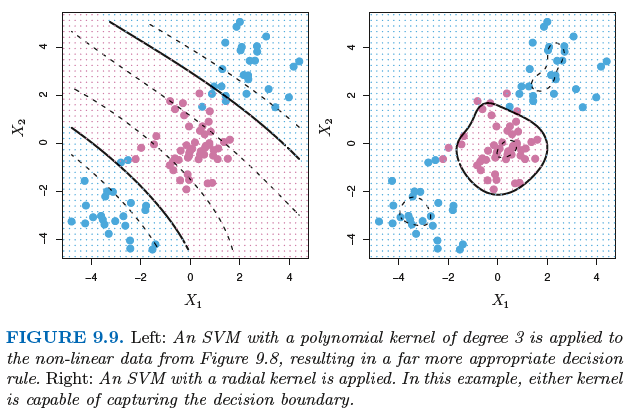

In [ ]:
Image('/content/pw99.PNG', width =600)

### Lab
+ Fit an SVM using a **non-linear kernel** using the ${\tt SVC()}$ function. However, now we use a different value of the parameter kernel.
+ To fit an SVM with a polynomial kernel we use ${\tt kernel="poly"}$, and to fit an SVM with a radial kernel we use ${\tt kernel="rbf"}$.
+ In the former case we also use the ${\tt degree}$ argument to specify a degree for the polynomial kernel, and in the latter case we use ${\tt gamma}$ to specify a value of $\gamma$ for the radial basis kernel.

+ Let's generate some data with a non-linear class boundary:


+ 使用 ${\tt SVC()}$ 函数，使用**非线性核**拟合 SVM。但是，现在我们使用不同的参数核值。
+ 要使用多项式核拟合 SVM，我们使用 ${\tt kernel="poly"}$，要使用径向核拟合 SVM，我们使用 ${\tt kernel="rbf"}$。
+ 在前一种情况下，我们还使用 ${\tt degree}$ 参数来指定多项式核的度数，在后一种情况下，我们使用 ${\tt gamma}$ 来指定径向基核的 $\gamma$ 值。

+ 让我们生成一些具有非线性类边界的数据：

Text(0, 0.5, 'X2')

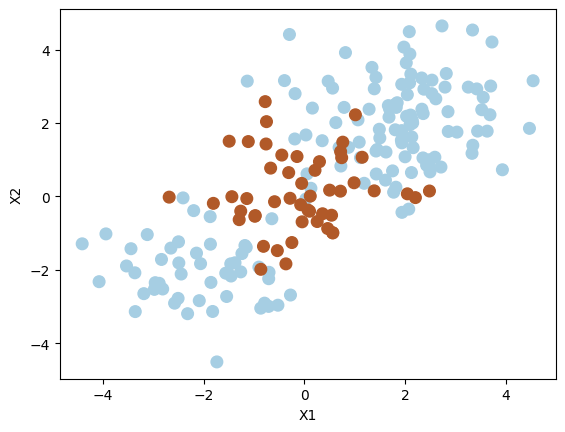

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

+ One class is kind of stuck in the middle of another class. This suggests that we might want to use a **radial kernel** in our SVM.
+ Fit the training data using the ${\tt SVC()}$ function with a radial kernel and $\gamma = 1$:


+ 一个类有点卡在另一个类的中间。这表明我们可能需要在 SVM 中使用 **径向核**。
+ 使用带有径向核和 $\gamma = 1$ 的 ${\tt SVC()}$ 函数拟合训练数据：

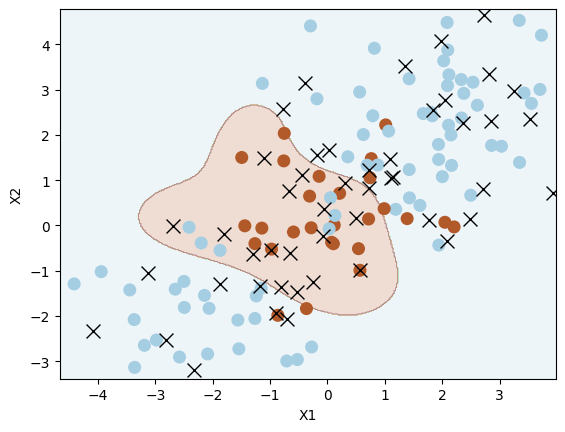

Number of support vectors:  51


In [ ]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

+ The plot shows that the resulting SVM has a decidedly non-linear boundary.
+ There are a fair number of training errors in this SVM fit.
+ Increase the value of cost to reduce the number of training errors:


+ 该图显示，生成的 SVM 具有明显的非线性边界。
+ 此 SVM 拟合中存在相当多的训练错误。
+ 增加成本值以减少训练错误的数量：

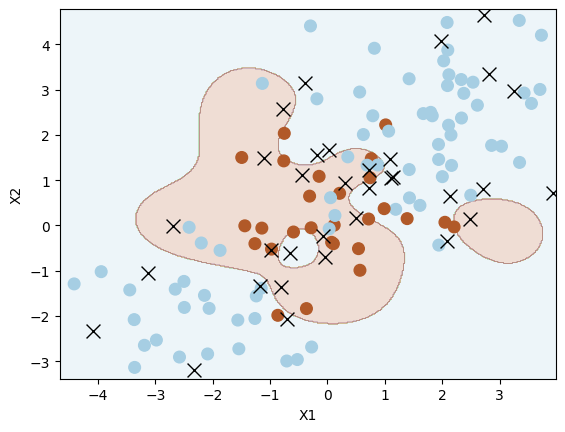

Number of support vectors:  36


In [ ]:
# Increasing C parameter, allowing more flexibility 增加 C 参数，允许更多灵活性
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

+ However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data.
+ We can perform cross-validation using ${\tt GridSearchCV()}$ to select the best choice of $\gamma$ and cost for an SVM with a radial kernel:

+ 然而，这是以更不规则的决策边界为代价的，似乎存在过度拟合数据的风险。
+ 我们可以使用 ${\tt GridSearchCV()}$ 进行交叉验证，为具有径向核的 SVM 选择最佳的 $\gamma$ 和成本：

In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 10, 'gamma': 0.5}

+ The best choice of parameters involves ${\tt cost=1}$ and ${\tt gamma=0.5}$.
+ Plot the resulting fit using the ${\tt plot\_svc()}$ function, and view the test set predictions for this model by applying the ${\tt predict()}$ function to the test data:

+ 最佳参数选择包括 ${\tt cost=1}$ 和 ${\tt gamma=0.5}$。
+ 使用 ${\tt plot\_svc()}$ 函数绘制结果拟合，并通过将 ${\tt predict()}$ 函数应用于测试数据来查看此模型的测试集预测：

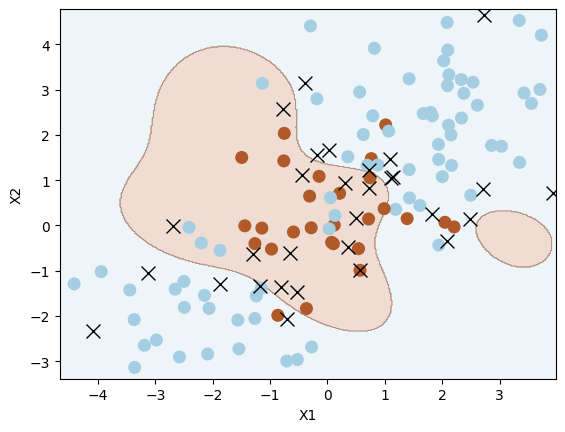

Number of support vectors:  32
[[66  7]
 [ 6 21]]
0.87


In [ ]:
plot_svc(clf.best_estimator_, X_test, y_test)
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)))
print(clf.best_estimator_.score(X_test, y_test))

85% of test observations are correctly classified by this SVM.

85% 的测试观测值被该 SVM 正确分类。

### ROC Curves

The ${\tt auc()}$ function from the ${\tt sklearn.metrics}$ package can be used to produce ROC curves such as those we saw in lecture:

${\tt sklearn.metrics}$ 包中的 ${\tt auc()}$ 函数可用于生成我们在讲座中看到的 ROC 曲线：

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

Let's start by fitting two models, one more flexible than the other:

让我们首先拟合两个模型，一个比另一个更灵活：

In [ ]:
# More constrained model 更受约束的模型
svm3 = SVC(C=1, kernel='rbf', gamma=1)
svm3.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [ ]:
# More flexible model 更灵活的模型
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, gamma=50)

+ SVMs and SVCs output class labels for each observation.
+ However, it is also possible to obtain fitted values for each observation, which are the numerical scores used to obtain the class labels.
+ For instance, in the case of a SVC, the fitted value for an observation $X = (X_1,X_2, . . .,X_p)^T$ takes the form $\hat\beta_0 + \hat\beta_1X_1 + \hat\beta_2X_2 + . . . + \hat\beta_pX_p$.

+ In essence, the sign of the fitted value determines on which side of the decision boundary the observation lies.
+ Therefore, the relationship between the fitted value and the class prediction for a given observation is simple: if the fitted value exceeds zero then the observation is assigned to one class, and if it is less than zero than it is assigned to the other.

+ In order to obtain the fitted values for a given SVM model fit, we use the ${\tt .decision\_function()}$ method of the SVC:



+ SVM 和 SVC 为每个观察输出类标签。
+ 但是，也可以为每个观察获取拟合值，这些拟合值是用于获取类标签的数值分数。
+ 例如，在 SVC 的情况下，观察 $X = (X_1,X_2, . . .,X_p)^T$ 的拟合值采用 $\hat\beta_0 + \hat\beta_1X_1 + \hat\beta_2X_2 + . . . + \hat\beta_pX_p$ 的形式。

+ 本质上，拟合值的符号决定了观察位于决策边界的哪一侧。
+ 因此，给定观察的拟合值和类预测之间的关系很简单：如果拟合值超过零，则将观察分配给一个类，如果小于零，则将其分配给另一个类。

+ 为了获得给定 SVM 模型拟合的拟合值，我们使用 SVC 的 ${\tt .decision\_function()}$ 方法：

In [ ]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

Now we can produce the ROC plot to see how the models perform on both the training and the test data:

现在我们可以生成 ROC 图来查看模型在训练和测试数据上的表现：

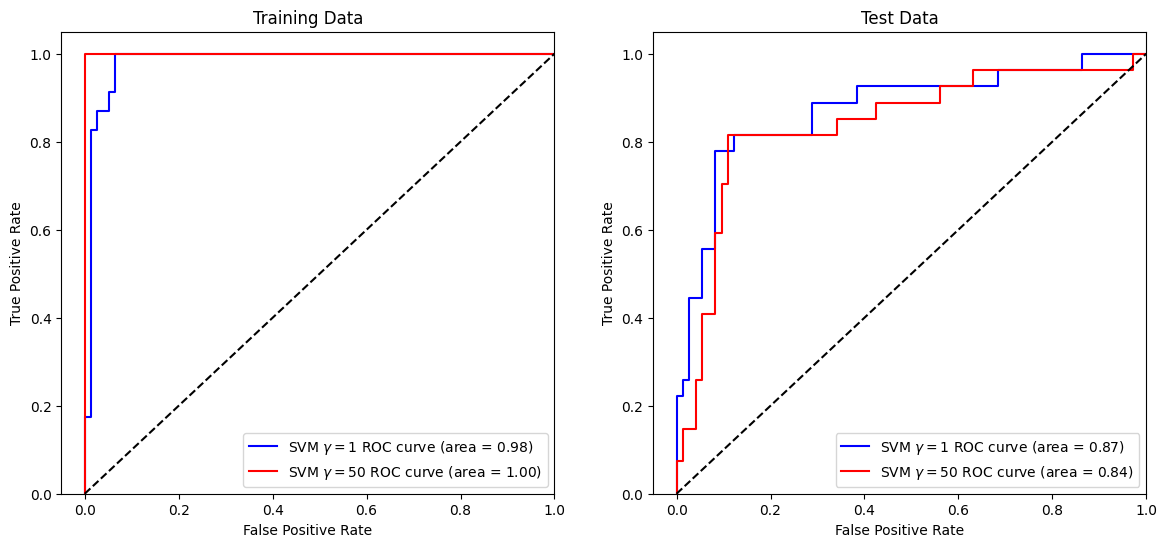

In [ ]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")


## Multi-Class SVM 多类 SVM
+ Two different approaches for $K$ classes where $K > 2$.
**One vs One**
+ Also known as **all-pairs** approach.
+ Constructs ${K \choose 2}$ SVMs, each of which compares a pair of class.
+ Test observations are assigned to the class which it was most frequently assigned.

**One vs All**
+ Constructs $K$ SVMs, each time comparing one of the $K$ class to the remaining $K-1$ classes.
+ The test observation is belong to the class with the greatest distance from the hyperplane, i.e., $\beta_{0k} + \beta_{1k}x_1^* + \beta_{2k}x_2^* +  \ldots + \beta_{pk}x_p^*$ is largest.


+ 两种不同的方法，适用于 $K$ 个类别，其中 $K > 2$。
**一对一**
+ 也称为**全对**方法。
+ 构建 ${K \choose 2}$ 个 SVM，每个 SVM 比较一对类别。
+ 测试观察结果被分配给最常被分配的类别。

**一对全**
+ 构建 $K$ 个 SVM，每次将 $K$ 个类别中的一个与剩余的 $K-1$ 个类别进行比较。
+ 测试观察结果属于与超平面距离最大的类别，即 $\beta_{0k} + \beta_{1k}x_1^* + \beta_{2k}x_2^* + \ldots + \beta_{pk}x_p^*$ 最大。

### Lab
+ If the response is a factor containing more than two levels, then the ${\tt svm()}$function will perform multi-class classification using the one-versus-one approach.
+ We explore that setting here by generating a third class of observations:


+ 如果响应是一个包含两个以上级别的因素，则 ${\tt svm()}$ 函数将使用一对一方法执行多类分类。
+ 我们在此通过生成第三类观察来探索该设置：

Text(0, 0.5, 'XX2')

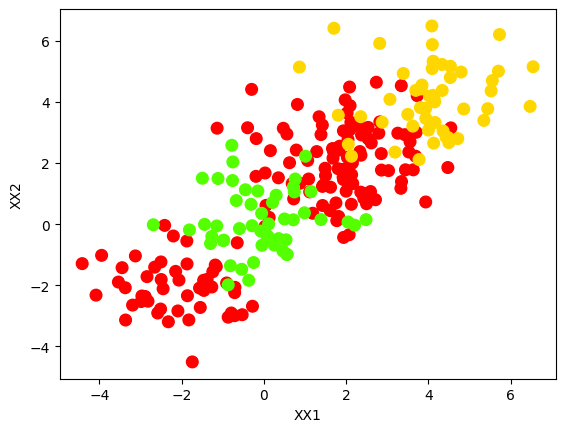

In [ ]:
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2')

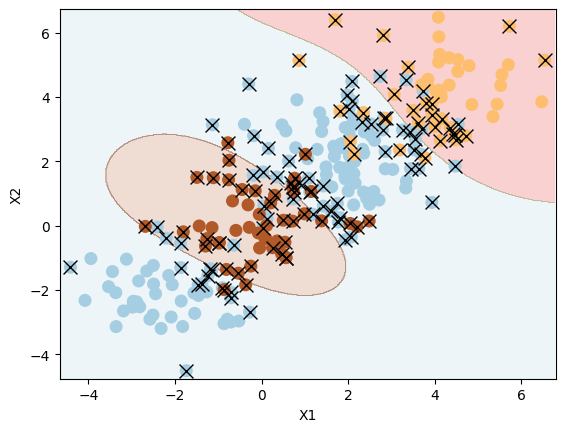

Number of support vectors:  128


In [ ]:
# Fitting an SVM to multiclass data uses identical syntax to fitting a simple two-class model:
# 将 SVM 拟合到多类数据使用与拟合简单的二类模型相同的语法：
svm5 = SVC(C=1, kernel='rbf')
svm5.fit(XX, yy)
plot_svc(svm5, XX, yy)

## Application to Handwritten Letter Data 对手写字母数据的应用

+ We now examine [`Optical Recognition of Handwritten Digits Data Set`](http://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits), which contains 5,620 samples of handwritten digits 0..9.
+ You can use these links to download the [training data](http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra) and [test data](http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes), and then we'll load them into python:


+ 我们现在检查 [`手写数字光学识别数据集`](http://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits)，其中包含 5,620 个 0..9 的手写数字样本。
+ 你可以使用这些链接下载 [训练数据](http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra) 和 [测试数据](http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes)，然后我们将它们加载到 python 中：

In [ ]:
X_train = pd.read_csv('/content/optdigits.tra.csv', header=None)
y_train = X_train[64]
X_train = X_train.drop(X_train.columns[64], axis=1)

X_test = pd.read_csv('/content/optdigits.tes.csv', header=None)
y_test = X_test[64]
X_test = X_test.drop(X_test.columns[64], axis=1)

In [ ]:
# Look at the dimensions of this dataset: 看看这个数据集的维度：
print(X_train.shape)
print(X_test.shape)

(3823, 64)
(1797, 64)


+ This data set consists of preprocessed images of handwriting samples gathered from 43 different people.
+ Each image was converted into an 8x8 matrix (64 pixels), which was then flattened into a vector of 64 numeric values.
+ The final column contains the class label for each digit.

+ The training and test sets consist of 3,823 and 1,797 observations respectively.
+ Let's see what one of these digits looks like:


+ 该数据集由从 43 个不同的人那里收集的经过预处理的手写样本图像组成。
+ 每幅图像都被转换成一个 8x8 矩阵（64 像素），然后被展平为一个包含 64 个数值的向量。
+ 最后一列包含每个数字的类标签。

+ 训练集和测试集分别包含 3,823 个和 1,797 个观测值。
+ 让我们看看其中一个数字是什么样子的：

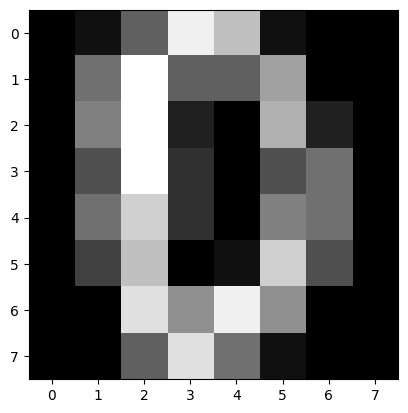

In [ ]:
plt.imshow(X_train.values[0].reshape(8,8), cmap="gray")
plt.show()

In [ ]:
y_train[0]

0

In [ ]:
# Let's start with a linear kernel to see how we do: 让我们从线性核开始看看我们如何做：
svc = SVC(kernel='linear', C=10)
svc.fit(X_train, y_train)

# Print a nice confusion matrix 打印一个很好的混淆矩阵
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
print(cm_df)

     0    1    2    3    4    5    6    7    8    9
0  376    0    0    0    0    0    0    0    0    0
1    0  389    0    0    0    0    0    0    0    0
2    0    0  380    0    0    0    0    0    0    0
3    0    0    0  389    0    0    0    0    0    0
4    0    0    0    0  387    0    0    0    0    0
5    0    0    0    0    0  376    0    0    0    0
6    0    0    0    0    0    0  377    0    0    0
7    0    0    0    0    0    0    0  387    0    0
8    0    0    0    0    0    0    0    0  380    0
9    0    0    0    0    0    0    0    0    0  382


+ We see that there are **no training errors**.
+ This is not surprising, because the large number of variables relative to the number of observations implies that it is easy to find hyperplanes that fully separate the classes.
+ We are most interested not in the support vector classifier’s performance on the training observations, but rather its performance on the test observations:


+ 我们看到**没有训练错误**。
+ 这并不奇怪，因为相对于观测值数量而言，变量数量很大，这意味着很容易找到完全分离类别的超平面。
+ 我们最感兴趣的不是支持向量分类器在训练观测上的表现，而是它在测试观测上的表现：

In [ ]:
cm = confusion_matrix(y_test, svc.predict(X_test))
print(pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_))
print(svc.score(X_test, y_test))

     0    1    2    3    4    5    6    7    8    9
0  177    0    0    1    0    0    0    0    0    1
1    0  178    7    0    0    0    0    0    9    0
2    0    0  170    5    0    1    0    0    1    0
3    0    0    0  171    0    0    0    0    5    4
4    0    0    0    0  180    0    1    1    0    1
5    1    0    0    2    0  180    0    7    2    3
6    0    3    0    0    0    0  179    0    0    0
7    0    0    0    2    0    0    0  165    0    0
8    0    1    0    1    1    0    1    0  157    1
9    0    0    0    1    0    1    0    6    0  170
0.9610461880912632


+ We see that using cost = 10 yields just 70 test set errors on this data.
+ Now try using the  ${\tt GridSearchCV()}$  function to select an optimal value for ${\tt c}$. Consider values in the range 0.01 to 100:


+ 我们发现，使用 cost = 10 只会在这些数据上产生 70 个测试集错误。
+ 现在尝试使用 ${\tt GridSearchCV()}$ 函数为 ${\tt c}$ 选择最佳值。考虑 0.01 到 100 范围内的值：

In [ ]:
# Select the optimal C parameter by cross-validation 通过交叉验证选择最佳C参数
tuned_parameters = [{'C': [0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [ ]:
clf.best_params_

{'C': 0.01}

In [ ]:
svc2 = SVC(C=0.01, kernel='linear')
svc2.fit(X_train, y_train)
cm2 = confusion_matrix(y_test, svc2.predict(X_test))
print(pd.DataFrame(cm2.T, index=svc2.classes_, columns=svc2.classes_))
print(svc2.score(X_test, y_test))

     0    1    2    3    4    5    6    7    8    9
0  177    0    0    1    0    0    0    0    0    1
1    0  178    7    0    0    0    0    0    8    1
2    0    0  170    5    0    1    0    0    1    0
3    0    0    0  170    0    0    0    0    3    4
4    0    0    0    0  180    0    1    1    0    1
5    1    0    0    3    0  180    0    7    2    3
6    0    2    0    0    0    0  179    0    0    0
7    0    0    0    2    0    0    0  165    0    0
8    0    1    0    1    1    0    1    0  159    1
9    0    1    0    1    0    1    0    6    1  169
0.9610461880912632


# Exercises

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1

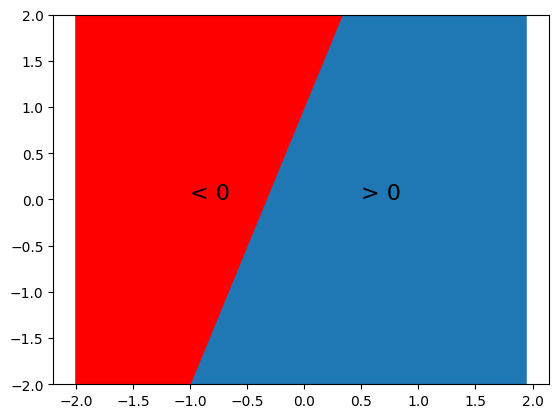

In [ ]:
section = np.arange(-2, 2, 1/20.)
f = lambda x: 1 + 3*x
plt.fill_between(section, f(section), y2=-2)
plt.fill_between(section, f(section), y2=2, color='r')
plt.text(.5, 0, "> 0", fontsize=16)
plt.text(-1, 0, "< 0", fontsize=16)
plt.ylim(-2, 2);

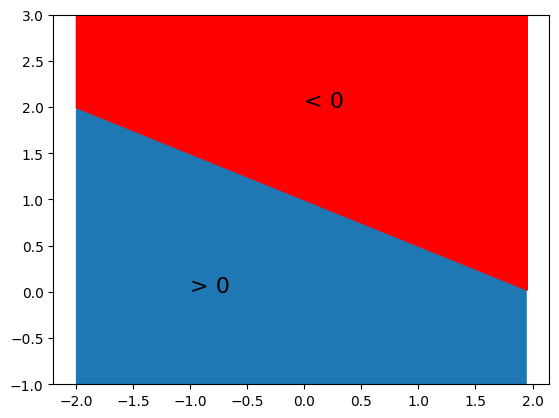

In [ ]:
section = np.arange(-2, 2, 1/20.)
f = lambda x: 1 - .5*x
plt.fill_between(section, f(section), y2=-1)
plt.fill_between(section, f(section), y2=3, color='r')
plt.text(0, 2, "< 0", fontsize=16)
plt.text(-1, 0, "> 0", fontsize=16)
plt.ylim(-1, 3);

# 2

(-1.0, 5.0)

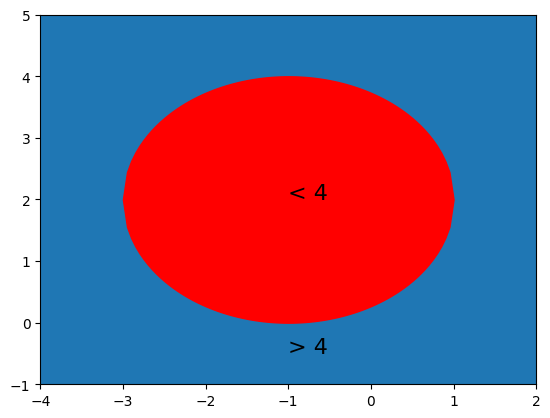

In [ ]:
section = np.arange(-3, 1.05, 1/20.)
f = lambda x: 2 + np.sqrt(4 - (1 + x)**2)
g = lambda x: 2 - np.sqrt(4 - (1 + x)**2)
plt.fill_between(np.arange(-5, 5), -10, 10)
plt.fill_between(section, g(section), f(section), color='r')
plt.text(-1, 2, "< 4", fontsize=16)
plt.text(-1, -.5, "> 4", fontsize=16)
plt.xlim(-4, 2)
plt.ylim(-1, 5)

c)
* (0, 0) = blue
* (-1, 1) = red  
* (2, 2) = blue
* (3, 8) = blue

d) x1, x2, x1^2 and x^2 are linear in 4 dimensions. When it is projected down to 2 dimensions we get a circle.


x1、x2、x1^2 和 x^2 在 4 维空间中呈线性。当将其投影到 2 维空间时，我们得到一个圆。

# 3

In [ ]:
df = pd.DataFrame(np.array([[3, 4, -1], [2, 2, -1], [4, 4, -1], [1, 4, -1], [2, 1, 1], [4, 3, 1], [4, 1, 1]]),
             columns=['x1', 'x2', 'y'])
df['color'] = df['y'].map({1: 'r', -1:'b'})
df

,x1,x2,y,color
0,3,4,-1,b
1,2,2,-1,b
2,4,4,-1,b
3,1,4,-1,b
4,2,1,1,r
5,4,3,1,r
6,4,1,1,r


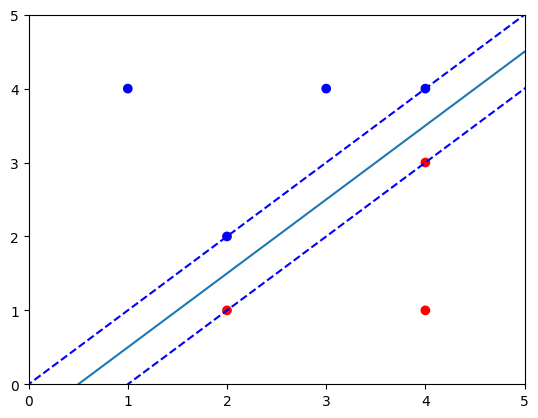

In [ ]:
plt.scatter(df['x1'], df['x2'], color=df['color']);
# maximum separating hyperplane is x1 - x2 - .5 = 0  最大分离超平面是 x1 - x2 - .5 = 0
section = np.arange(-3, 8)
f = lambda x: x - .5
plt.plot(section, f(section))
plt.plot(section, f(section) + .5, 'b--')
plt.plot(section, f(section) - .5, 'b--')
plt.ylim(0, 5)
plt.xlim(0, 5);

d) Classification rule if x1 - x2 - .5 > 0 then red else blue

分类规则 如果 x1 - x2 - .5 > 0 则为红色 否则为蓝色

In [ ]:
# e) margin is distance from support vector to line. 边距是支持向量到线的距离。
print("margin is", .5 / np.sqrt(2))

margin is 0.35355339059327373


f) point (4, 1) is far from the hyperplane and changing it slightly will have no effect on it.

点 (4, 1) 距离超平面较远，稍微改变它不会对其产生影响。

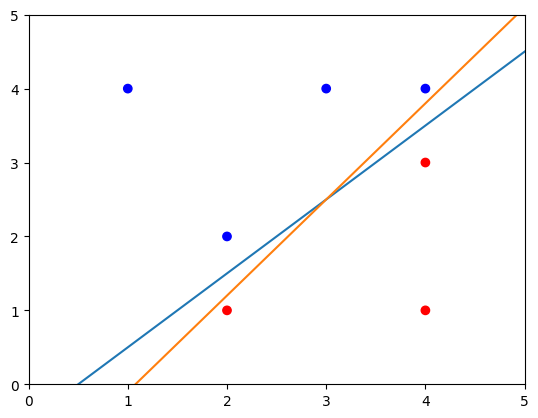

In [ ]:
#g Green line is non-optimal hyperplane. Still separates data but worse margin
# 绿线是非最优超平面。仍然分离数据，但边际较差
plt.scatter(df['x1'], df['x2'], color=df['color']);
# maximum separating hyperplane is x1 - x2 - .5 = 0  最大分离超平面是 x1 - x2 - .5 = 0
section = np.arange(-3, 8)
f = lambda x: x - .5
g = lambda x: 1.3 * x - 1.4
plt.plot(section, f(section))
plt.plot(section, g(section))
plt.ylim(0, 5)
plt.xlim(0, 5);

# 4

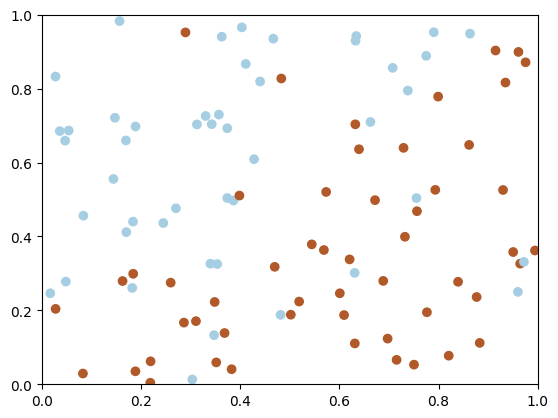

In [ ]:
# create fake data where true boundary is x2 - x1 = 0 创建虚假数据，其中真实边界是 x2 - x1 = 0
X = np.random.rand(100, 2)
d = 3 * (X[:, 0] - X[:, 1])
n = np.random.randn(100)
y = np.where(n > d, 0, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlim(0, 1)
plt.ylim(0, 1);

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel='linear', C=10)

In [ ]:
clf.fit(X, y)

SVC(C=10, kernel='linear')

In [ ]:
clf.intercept_, clf.coef_

(array([0.29400334]), array([[ 3.71434395, -3.87367512]]))

(0.0, 1.0)

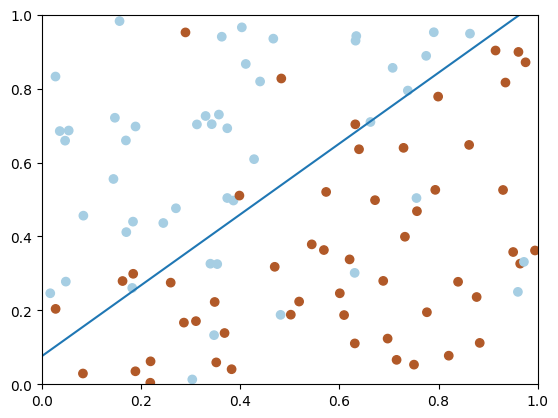

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
section = np.arange(0, 1, .01)

beta0 = clf.intercept_
beta1 = clf.coef_[0, 0]
beta2 = clf.coef_[0, 1]

f = lambda x: (beta0 + beta1 * x) / -beta2
plt.plot(section, f(section))
plt.xlim(0, 1)
plt.ylim(0, 1)

Use sklearn code found [here](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html) to plot decision boundaries for svm

使用此处的 sklearn 代码(http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html)绘制 svm 的决策边界

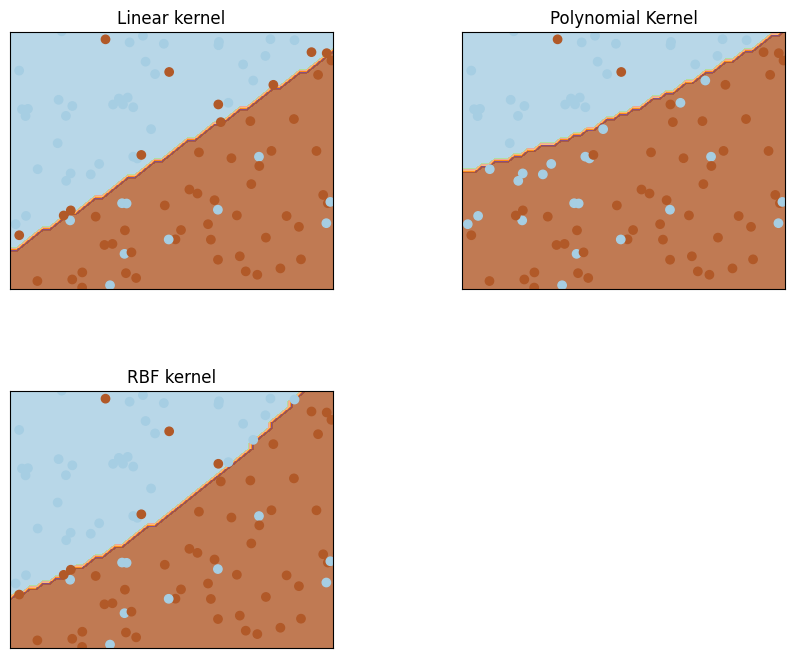

In [ ]:
h = .02  # step size in the mesh 网格中的步长

C = 1.0  # SVM regularization parameter SVM正则化参数
svc = SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(X, y)

# create a mesh to plot in 创建要绘图的网格
xx, yy = np.meshgrid(np.arange(0, 1, h),
                     np.arange(0, 1, h))

# title for the plots 地块标题
titles = ['Linear kernel',
          'Polynomial Kernel',
          'RBF kernel']

plt.figure(figsize=(10,8))
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    # 绘制决策边界。为此，我们将为网格 [x_min, x_max]x[y_min, y_max] 中的每个点分配一种颜色。
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot 将结果放入颜色图中
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points 绘制训练点
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

In [ ]:
# poly actually does worse. Might need some tuning
# poly 实际上表现更差。可能需要一些调整
svc.score(X, y), rbf_svc.score(X, y), poly_svc.score(X, y)

(0.8, 0.84, 0.76)

# 5

In [ ]:
X = np.random.rand(500,2) - .5
y = (X[:, 0] ** 2 - X[:, 1] ** 2 > 0) * 1

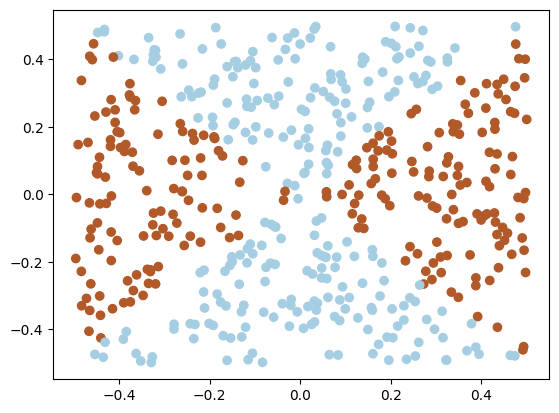

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired);

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_clf = LogisticRegression()

In [ ]:
log_clf.fit(X, y)

LogisticRegression()

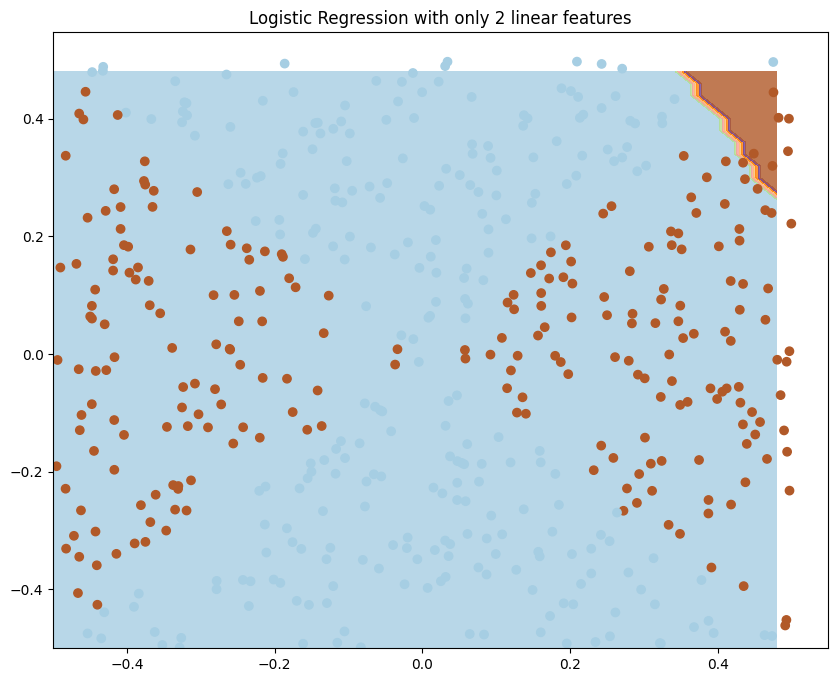

In [ ]:
h = .02

xx, yy = np.meshgrid(np.arange(-.5, .5, h),
                     np.arange(-.5, .5, h))

plt.figure(figsize=(10,8))
Z = log_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Logistic Regression with only 2 linear features");

In [ ]:
X_new = np.column_stack((X, X ** 2, X[:, 0] * X[:, 1]))

In [ ]:
X_new.shape

(500, 5)

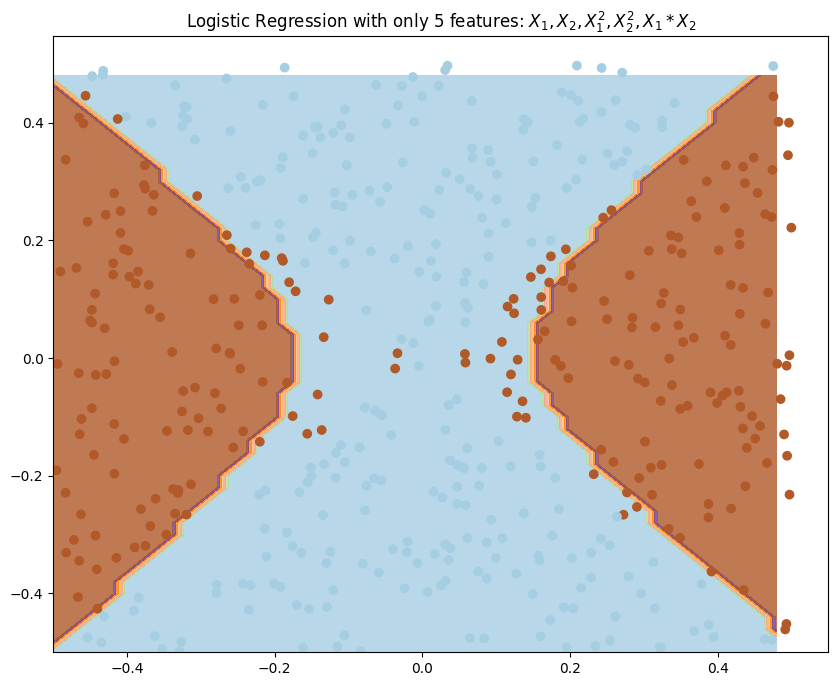

In [ ]:
log_clf.fit(X_new, y)

h = .02

xx, yy = np.meshgrid(np.arange(-.5, .5, h),
                     np.arange(-.5, .5, h))


plt.figure(figsize=(10,8))
Z = log_clf.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2, xx.ravel() * yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Logistic Regression with only 5 features: $X_1, X_2, X_1^2, X_2^2, X_1*X_2$");

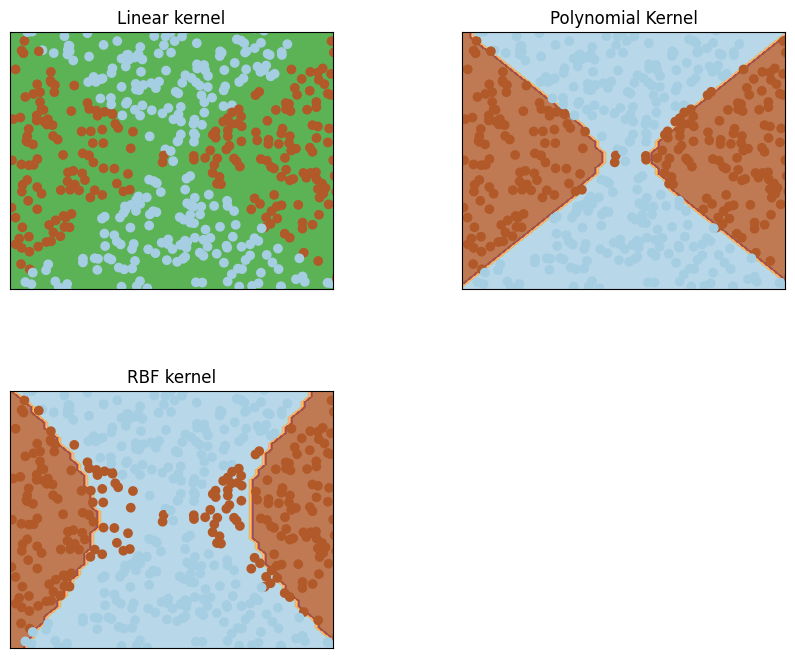

In [ ]:
h = .02  # step size in the mesh 网格中的步长

C = 1.0  # SVM regularization parameter SVM正则化参数
svc = SVC(kernel='linear', C=C).fit(X, y)
poly_svc = SVC(kernel='poly', degree=2, C=1).fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=.5, C=1).fit(X, y)

# create a mesh to plot in 创建要绘图的网格
xx, yy = np.meshgrid(np.arange(-.5, .5, h),
                     np.arange(-.5, .5, h))

# title for the plots 地块标题
titles = ['Linear kernel',
          'Polynomial Kernel',
          'RBF kernel']

plt.figure(figsize=(10,8))
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot 将结果放入颜色图中
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points 绘制训练点
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

Linear Kernel fails here, must use polynomial or rbf

线性核函数在这里失效了，必须使用多项式或 rbf

# 6

In [ ]:
# Make a linear decision boundary at x2 > .5 在 x2 > .5 处建立线性决策边界
X = np.random.rand(500, 2)
y = (X[:, 1] > .5) * 1

X_train = X[:250]
X_test = X[250:]
y_train = y[:250]
y_test = y[250:]

(0.0, 1.0)

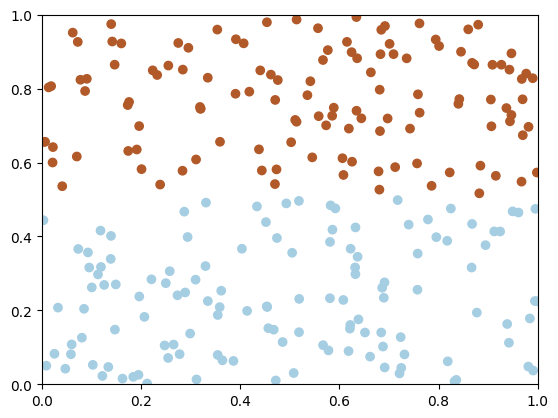

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlim(0, 1)
plt.ylim(0, 1)

In [ ]:
all_C = np.logspace(-2,-1, 100)
train_scores = []
test_scores = []
for c in all_C:
    svc = SVC(kernel='linear', C=c)
    svc.fit(X_train, y_train)
    train_scores.append(svc.score(X_train, y_train))
    test_scores.append(svc.score(X_test, y_test))

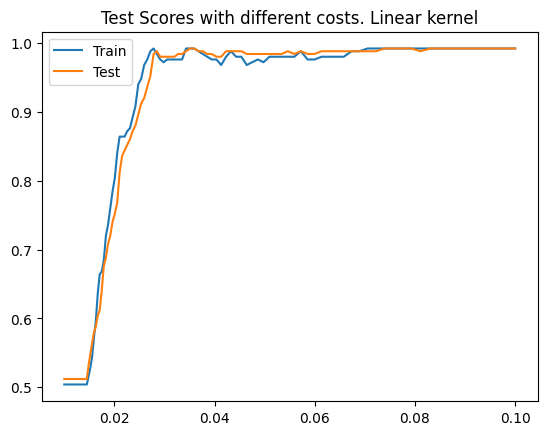

In [ ]:
plt.plot(all_C, train_scores, label="Train")
plt.plot(all_C, test_scores, label="Test")
plt.title("Test Scores with different costs. Linear kernel")
plt.legend();

I don't think they worded this problem well. There needs to be a linearl separable data that has a wide enough decision boundary where points can be misclassified given new data.

我认为他们对这个问题的表述不太好。需要有一个线性可分的数据，该数据具有足够宽的决策边界，在新数据的情况下，点可能会被错误分类。

# 7

In [ ]:
auto = pd.read_csv("/content/auto.csv")

In [ ]:
auto['y'] = (auto['mpg'] > auto['mpg'].median()) * 1

In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,y
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [ ]:
X = pd.concat((pd.get_dummies(auto[['cylinders', 'origin', 'year']].astype(object)),
               auto[['displacement', 'horsepower', 'weight', 'acceleration']],), axis=1)
y = auto['y']

In [ ]:
X.head()

,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3,year_70,year_71,...,year_77,year_78,year_79,year_80,year_81,year_82,displacement,horsepower,weight,acceleration
0,False,False,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,307.0,130,3504,12.0
1,False,False,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,350.0,165,3693,11.5
2,False,False,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,318.0,150,3436,11.0
3,False,False,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,304.0,150,3433,12.0
4,False,False,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,302.0,140,3449,10.5


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
X_new = auto.iloc[:, 1:7]

In [ ]:
for c in np.logspace(-4,1, 10):
    clf = SVC(kernel='linear', C=c)
    scores = cross_val_score(clf, X_new, y, n_jobs=-1, cv=5)
    print("Linear SVM with c={} has test accuracy of {}".format(round(c,4), round(scores.mean(), 3)))

Linear SVM with c=0.0001 has test accuracy of 0.898
Linear SVM with c=0.0004 has test accuracy of 0.905
Linear SVM with c=0.0013 has test accuracy of 0.9
Linear SVM with c=0.0046 has test accuracy of 0.88
Linear SVM with c=0.0167 has test accuracy of 0.878
Linear SVM with c=0.0599 has test accuracy of 0.873
Linear SVM with c=0.2154 has test accuracy of 0.87
Linear SVM with c=0.7743 has test accuracy of 0.86
Linear SVM with c=2.7826 has test accuracy of 0.87
Linear SVM with c=10.0 has test accuracy of 0.87


In [ ]:
for c in np.logspace(-2,3, 10):
    gamma = .00001
    clf = SVC(kernel='rbf', gamma=gamma, C=c)
    scores = cross_val_score(clf, X_new, y, n_jobs=-1, cv=5)
    print("RBF SVM with c={} and gamma = {} has test accuracy of {}".format(round(c,4), gamma, round(scores.mean(), 3)))

RBF SVM with c=0.01 and gamma = 1e-05 has test accuracy of 0.822
RBF SVM with c=0.0359 and gamma = 1e-05 has test accuracy of 0.88
RBF SVM with c=0.1292 and gamma = 1e-05 has test accuracy of 0.883
RBF SVM with c=0.4642 and gamma = 1e-05 has test accuracy of 0.88
RBF SVM with c=1.6681 and gamma = 1e-05 has test accuracy of 0.885
RBF SVM with c=5.9948 and gamma = 1e-05 has test accuracy of 0.883
RBF SVM with c=21.5443 and gamma = 1e-05 has test accuracy of 0.883
RBF SVM with c=77.4264 and gamma = 1e-05 has test accuracy of 0.898
RBF SVM with c=278.2559 and gamma = 1e-05 has test accuracy of 0.898
RBF SVM with c=1000.0 and gamma = 1e-05 has test accuracy of 0.89


Polynomial kernel not able to be solved in reasonable time

多项式核无法在合理的时间内得到求解